<a href="https://colab.research.google.com/github/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/blob/main/exposome_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exposome research analytics: An Hands-on Data Analysis Tutorial**  

<img src="https://github.com/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/blob/main/figures/2_ATHLETE_logo_subtitle_color.png?raw=1" alt="ISGlobal logo" width="450"/>  

<img src="https://github.com/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/blob/main/figures/exposoma.png?raw=1" alt="ISGlobal logo" width="500"/>

**Alan Domínguez**, Predoctoral Researcher at the Barcelona Institute for Global Health (ISGlobal).  

**Augusto Anguita-Ruiz**, Junior Leader Researcher at the Barcelona Institute for Global Health (ISGlobal).

**Juan Ramón Gonzalez**, Associate Professor at the Barcelona Institute for Global Health (ISGlobal).

**Xavier Basagaña**, Associate Professor at the Barcelona Institute for Global Health (ISGlobal).

The exposome, described as "the totality of human environmental exposures from conception onwards," recognizes that individuals are simultaneously exposed to multiple different environmental factors, adopting a holistic approach for the discovery of etiological factors of disease. The main advantage of the exposome approach over more traditional ones—“one exposure, one disease or health outcome”—is that it provides a framework for the study of multiple environmental risks (urban, chemical, lifestyle, social, etc...) and their combined effects on health.

The **objective** of this session is to offer an **introduction to the different statistical approaches** necessary to address the main questions of **exposome research**. Every exposome analysis should consist on two main tasks (descriptive analysis, and association analysis):

**1. Descriptive Analysis:**  
In the first part of the session, the concept of descriptive analysis in exposomics will be addressed, through which the first conclusions about the data are drawn. Among other objectives, descriptive analysis aims to identify possible outliers, confounding factors, or variables that require transformations prior to analysis. At the same time, descriptive analysis allows a preliminary comparison of the experimental groups under study, the examination of the existing patterns of correlation among exposure factors, and the identification of grouping phenomena in the data (both at the level of individuals and of features). All of these are essential steps to choose the most appropriate subsequent statistical approach.

Some of the contents we will review in this section:  
* **Visualization of the distribution and concentration of exposome variables.**  
* **Correlation between exposures.**  
* **Principal Component Analysis (PCA) applied to exposome variables.**

**2. Association Analysis:**  
Association analysis aims to identify possible environmental exposure factors associated with different health parameters. In this section of the session, different holistic analytical approaches focused on the study of the effects of multiple exposure factors and their mixtures on health will be presented. This includes mainly models such as ExWAS (Exposome-Wide Association Analysis), or others for the study of interactions or non-linearity phenomena (e.g., Bayesian Kernel Machine Regression). An introduction will also be presented to clustering methods or exposure mixture methods (e.g., Weighted Quantile Sum Regression). During their study, concepts of great importance in exposome analysis will be introduced, such as feature selection or multiple testing correction.

Some of the contents we will review in this section:  
* **Exposure Wide Association Analysis (ExWas)**  
* **Methods for variable selection (Stepwise, Elastic net, DSA)**  
* **Weighted quantile sum regression**  
* **Clustering**  
* **Bayesian Kernel Machine Regression**



# **Reminder: Introduction to NoteBook**

Within this notebook (*NoteBook*), you will be guided step by step from loading a dataset to performing analysis of its content.

The *Jupyter* (Python) notebook is an approach that combines text blocks (like this one) together with code blocks or cells. The great advantage of this type of cell is its interactivity, as they can be executed to check the results directly within them. *Very important:* **the order of instructions is fundamental**, so each cell in this notebook must be executed sequentially. If any are omitted, the program may throw an error, so you should start from the beginning if in doubt.

First of all:

It is **very very important** that at the start you select **"*Open in draft mode*" (draft mode)**, at the top left. Otherwise, it will not allow you to execute any code block, for security reasons. When the first of the blocks is executed, the following message will appear: "*Warning: This notebook was not created by Google.*". Do not worry, you should trust the content of the notebook (*NoteBook*) and click "Run anyway".

Let’s go!

Click the "play" button on the left side of each code cell. Lines of code that begin with a hashtag (#) are comments and do not affect the execution of the program.

You can also click on each cell and press "*ctrl+enter*" (*cmd+enter* on Mac).

Each time you run a block, you will see the output just below it. The information is usually always related to the last instruction, along with all the `print()` commands in the code.



## **INDEX**
1. [Installation of the R environment and required libraries for exposome analysis](#install-libraries)    
2. [Load data](#load-data)
3. [Exposome descriptive analysis](#descriptive)   
4. [Exposome association analysis](#association)
3. [Other tutorials for exposome research](#tutorials)   
4. [Acknowledgement](#acknowledgement)   


## **1. Installation of the R Environment and Libraries for Exposome Analysis** <a name="install-libraries"></a>

Below, we install/load the libraries necessary for this session. In the context of exposome analysis, R libraries offer us a much more convenient way to process, manipulate, and analyze the data. Some of these libraries: `tidyverse`, `skimr`, `rexposome`, `bkmr`, `gWQS`.  
  
The installation of R in our Google Colab environment will be carried out in the following code block. It should be remembered that all library installations we perform in the Google Colab environment will only remain active for a few hours, after which the installed libraries are removed. Therefore, it will be necessary for you to re-run the library installation code in this section whenever you need to run the notebook again after this time.

**Note:** We recommend installing the libraries **30 minutes** before the start of the session❗❗❗

In [ ]:
# first we check the R version we have
#R.Version()

* **Install/load libraries for the session**

We will install/load the libraries necessary for the practical session, for this we will use the `pacman` package, this package is a management tool that combines the functionalities of the `install.packages` + `library` functions.


In [ ]:
# Estimated execution time: 3 seconds approx.

install.packages('pacman') # allows us to install/upload packages simultaneously

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Instalaremos `BiocManager` y `rexposome` (estos dos paquetes son fundamentales para el análsis del exposoma), utilizando el siguiente código ya que algunas veces suele tener problemas de compatibilidad con la versión de R (el proceso tarda alrededor de **20 minutos**, por lo que se recomienda instalarla durante la sesión teórica.

In [ ]:
# Estimated execution time: 23 minutes approx.

if (!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")

packages = c('Biobase', 'mice', 'MultiDataSet', 'lsr', 'FactoMineR',
	'stringr', 'circlize', 'corrplot', 'ggplot2', 'reshape2', 'pryr',
	'scales', 'imputeLCMD', 'scatterplot3d', 'glmnet', 'gridExtra',
	'grid', 'Hmisc', 'gplots', 'gtools', 'S4Vectors'
)
for( pkg in packages ) {
  if( !pkg %in% rownames( installed.packages() ) ) {
    message( "Installing ", pkg )
    BiocManager::install( pkg )
  }
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing Biobase

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)

Installing package(s) 'BiocVersion', 'Biobase'

also installing the dependency ‘BiocGenerics’


Old packages: 'textshaping', 'utf8'

Installing mice

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.25), R 4.5.0 (2025-04-11)

Installing package(s) 'mice'

also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘ucminf’, ‘numDeriv’, ‘iterators’, ‘lme4’, ‘ordinal’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘pan’, ‘jomo’

In [ ]:
# Estimated execution time: approx. 2 minutes.
# install rexposome (the installation of rexposome takes a while depending on our connection)
install.packages("devtools")
devtools::install_github("isglobal-brge/rexposome")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




utf8 (1.2.4 -> 1.2.5) [CRAN]


Installing 1 packages: utf8

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmppyetJy/remotes12b2871db79/isglobal-brge-rexposome-0bb431c/DESCRIPTION’ ... OK
* preparing ‘rexposome’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rexposome_1.21.1.tar.gz’
Warning in utils::tar(filepath, pkgname, compression = compression, compression_level = 9L,  :
  storing paths of more than 100 bytes is not portable:
  ‘rexposome/vignettes/rsconnect/documents/exposome_data_analysis.Rmd/rpubs.com/rpubs/Publish Document.dcf’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#for those who have an older version of R (in the case of using Rstudio desktop)
#devtools::install_github("isglobal-brge/rexposome", ref="R-3.0")

In [ ]:
# Estimated execution time: 8 minutes approx.
# Add all the libraries we need to use (if the package is already installed, it will automatically load the package if it is in the pacman::p_load() function).
pacman::p_load(tidyverse, corrplot, RColorBrewer, skimr, bkmr, gWQS, ggridges, rexposome,
 MASS, caret, glmnet, partDSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


skimr installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dotCall64’, ‘spam’, ‘maps’, ‘fields’, ‘truncnorm’



bkmr installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘gridSVG’, ‘svglite’, ‘globals’, ‘listenv’, ‘parallelly’, ‘rlist’, ‘plotROC’, ‘kableExtra’, ‘future’, ‘future.apply’, ‘pscl’, ‘bookdown’



gWQS installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


ggridges installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘pROC’, ‘recipes’



caret installed

Installing package into

In [ ]:
#if (!require("BiocManager", quietly = TRUE))
#  install.packages("BiocManager")
#BiocManager::install("rexposome", force = TRUE)


## **2. Load the Data** <a name="load-data"></a>

Below are the **lines of code** necessary to **load** the Exposome dataset into the R environment. For this practical session, we will use data from the HELIX (Human Early-Life Exposome) exposome study. The HELIX study is a collaborative project among six population-based birth cohort longitudinal studies from six European countries (France, Greece, Lithuania, Norway, Spain, and the United Kingdom).

<img src="https://github.com/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/blob/main/figures/HELIX.png?raw=1" alt="HELIX logo" width="500"/>


**Note:** The data provided in this introductory course were semi-simulated from the real data of the HELIX sub-cohort. For more details on the HELIX project and the origin of the data collected we recommend consulting the following publication: https://bmjopen.bmj.com/content/8/9/e021311 and website: https://www.projecthelix.eu/es.

* The **exposome data (n = 1301)** that we will use are contained in an Rdata archive, the archive contains the following files:

1. `phenotype` (outcomes)
2. `exposome` (exposome)
3. `covariates` (covariates)


The `exposome` database contains more than **200 exposures**.

<img src="https://github.com/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/blob/main/figures/exposures_helix.png?raw=1" alt="HELIX exposures" width="450"/>

The description of each variable (name, structure, variable type, transformation, ...) is detailed in the [codebook](https://github.com/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/blob/main/data/codebook.csv).


**1.-** We load the data required for the session.

In [ ]:
# Option 1 (we will load the databases as csv files)
phenotype <- read.csv2(url("https://raw.githubusercontent.com/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/main/data/phenotype.csv"),  header = TRUE) # outcomes
exposome <- read.csv2(url("https://raw.githubusercontent.com/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/main/data/exposome.csv"), header = TRUE) # exposures
covariates <- read.csv2(url("https://raw.githubusercontent.com/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/main/data/covariates.csv"), header = TRUE) # covariates
codebook <- read.csv2(url("https://raw.githubusercontent.com/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/main/data/codebook.csv")) # codebook

In [ ]:
# Option 2 (we load an RData file, this file contains the 3 datasets + the codebook)
load(url("https://raw.githubusercontent.com/AugustoAnguita/ATHLETE.ExposomeAnalysis.Tutorial_draft/main/data/exposome.RData")) #one single line to load the whole dataset

In [ ]:
phenotype
exposome
covariates
codebook

,ID,e3_bw,hs_asthma,hs_zbmi_who,hs_correct_raven,hs_Gen_Tot,hs_bmi_c_cat
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>
1,1,4100,0,0.30,18,84.0000,2
2,2,4158,0,0.41,25,39.0000,2
3,3,4110,1,3.33,13,40.0000,4
4,4,3270,0,-0.76,28,54.5000,2
5,5,3950,0,0.98,19,18.0000,2
6,6,2900,1,-0.08,19,4.0000,2
7,7,3350,0,0.04,34,21.1875,2
8,8,3580,1,-0.10,16,8.0000,2
9,9,3000,0,-1.78,35,19.0625,2


,ID,h_abs_ratio_preg_Log,h_no2_ratio_preg_Log,h_pm10_ratio_preg_None,h_pm25_ratio_preg_None,hs_no2_dy_hs_h_Log,hs_no2_wk_hs_h_Log,hs_no2_yr_hs_h_Log,hs_pm10_dy_hs_h_None,hs_pm10_wk_hs_h_None,⋯,hs_globalexp2_None,hs_smk_parents_None,h_distinvnear1_preg_Log,h_trafload_preg_pow1over3,h_trafnear_preg_pow1over3,hs_trafload_h_pow1over3,hs_trafnear_h_pow1over3,h_bro_preg_Log,h_clf_preg_Log,h_thm_preg_Log
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.89671105,2.872304,25.94850,17.433798,2.530279,2.583284,2.612098,22.53583,20.850005,⋯,exposure,both,-5.629052,0.3458301,21.213987,135.99576,24.914911,-2.9759296,-0.5367134,0.2880726
2,2,0.89253797,2.980008,25.89774,18.470850,1.928600,2.652479,2.761064,14.07776,29.141274,⋯,no exposure,neither,-5.045588,0.3458301,22.649684,97.88442,27.905292,-2.9759296,1.0787497,3.1954784
3,3,0.77872299,3.056501,26.08735,18.711547,2.882591,2.591756,2.356163,46.85910,31.530981,⋯,no exposure,one,-4.204225,145.5727586,25.549436,127.53614,29.299706,-1.6044503,1.1887577,3.0239239
4,4,0.08905574,3.089157,14.99138,16.409771,1.390750,2.456717,2.403247,29.81744,25.232778,⋯,exposure,one,-3.088010,187.1200205,22.743850,114.86848,22.743850,2.7488186,3.6368129,3.8393351
5,5,0.60478093,3.848211,35.19730,14.889958,3.204449,3.499594,3.307663,29.81744,24.891465,⋯,no exposure,neither,-1.459250,158.4890394,29.872070,205.77478,14.131454,4.2621375,3.0278427,4.5727340
6,6,0.20045795,2.891142,19.76697,12.825988,3.537311,3.458832,3.443253,24.76304,22.893956,⋯,no exposure,neither,-2.722931,63.1132643,7.937005,150.94307,13.986892,2.7045022,3.6203667,3.8074699
7,7,0.49652571,3.373861,23.12116,19.425609,2.237178,2.044063,2.029703,24.01430,24.891465,⋯,no exposure,neither,-2.548100,30.2726349,7.937005,165.32919,15.095685,2.7089606,0.3371863,3.7164105
8,8,0.20515012,2.878540,19.68730,14.183917,3.082235,3.318016,3.367169,20.78633,23.188724,⋯,no exposure,neither,-4.383742,117.2477971,7.937005,153.93522,22.208216,2.7127035,3.5324524,3.8396766
9,9,0.15538213,3.365869,21.89084,18.900023,1.493143,1.930974,1.988530,21.19045,24.891465,⋯,no exposure,neither,-2.832079,51.7380022,8.962809,67.55812,8.962809,2.0083483,-6.9077553,1.8159404


,ID,h_cohort,e3_sex_None,e3_yearbir_None,h_mbmi_None,hs_wgtgain_None,e3_gac_None,h_age_None,h_edumc_None,h_native_None,h_parity_None,hs_child_age_None,hs_c_height_None,hs_c_weight_None
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,4,male,2008,25.51020,17,41.00000,28.00000,2,2,0,6.165640,1.220,23.4
2,2,4,male,2007,26.49151,18,41.00000,22.84155,3,2,1,6.992471,1.220,27.6
3,3,4,male,2008,30.11621,11,39.00000,34.23242,3,2,1,6.110883,1.280,37.5
4,4,2,female,2005,21.04805,21,39.28571,32.72553,1,2,1,10.138261,1.345,27.7
5,5,3,male,2005,22.15102,20,43.00000,20.86516,1,2,0,9.451175,1.370,34.0
6,6,1,female,2007,24.90358,30,38.85714,27.00000,3,2,0,6.384782,1.130,21.5
7,7,2,male,2003,27.51718,20,40.00000,39.60027,1,2,2,11.343030,1.315,29.8
8,8,1,female,2008,28.14870,20,40.57143,34.00000,2,0,0,6.338125,1.225,22.5
9,9,2,female,2004,23.02895,12,40.85714,30.38741,2,2,1,10.715948,1.510,24.3


,variable_name,domain,family,subfamily,period,location,period_postnatal,description,var_type,transformation,labels,labelsshort
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
h_abs_ratio_preg_Log,h_abs_ratio_preg_Log,Outdoor exposures,Air Pollution,PMAbsorbance,Pregnancy,Home,NA,abs value (extrapolated back in time using ratio method)duringpregnancy,numeric,Natural Logarithm,PMabs,PMabs
h_no2_ratio_preg_Log,h_no2_ratio_preg_Log,Outdoor exposures,Air Pollution,NO2,Pregnancy,Home,NA,no2 value (extrapolated back in time using ratio method)during pregnancy,numeric,Natural Logarithm,NO2,NO2
h_pm10_ratio_preg_None,h_pm10_ratio_preg_None,Outdoor exposures,Air Pollution,PM10,Pregnancy,Home,NA,pm10 value (extrapolated back in time using ratio method)duringpregnancy,numeric,None,PM10,PM10
h_pm25_ratio_preg_None,h_pm25_ratio_preg_None,Outdoor exposures,Air Pollution,PM2.5,Pregnancy,Home,NA,pm25 value (extrapolated back in time using ratio method)duringpregnancy,numeric,None,PM2.5,PM2.5
hs_no2_dy_hs_h_Log,hs_no2_dy_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Day before examination,no2 value (extrapolated back in time using ratio method)one day before hs test at home,numeric,Natural Logarithm,NO2(day),NO2(day)
hs_no2_wk_hs_h_Log,hs_no2_wk_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Week before examination,no2 value (extrapolated back in time using ratio method)one week before hs test at home,numeric,Natural Logarithm,NO2(week),NO2(week)
hs_no2_yr_hs_h_Log,hs_no2_yr_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Year before examination,no2 value (extrapolated back in time using ratio method)one year before hs test at home,numeric,Natural Logarithm,NO2(year),NO2(year)
hs_pm10_dy_hs_h_None,hs_pm10_dy_hs_h_None,Outdoor exposures,Air Pollution,PM10,Postnatal,Home,Day before examination,pm10 value (extrapolated back in time using ratio method)one day before hs test at home,numeric,None,PM10(day),PM10(day)
hs_pm10_wk_hs_h_None,hs_pm10_wk_hs_h_None,Outdoor exposures,Air Pollution,PM10,Postnatal,Home,Week before examination,pm10 value (extrapolated back in time using ratio method)one week before hs test at home,numeric,None,PM10(week),PM10(week)


**2.-** We check the data structure and dimension

In [ ]:
dplyr::glimpse(phenotype) # we have 1301 individuals and 7 health outcomes in the dataset

Rows: 1,301
Columns: 7
$ ID               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ e3_bw            <int> 4100, 4158, 4110, 3270, 3950, 2900, 3350, 3580, 3000,…
$ hs_asthma        <dbl> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,…
$ hs_zbmi_who      <dbl> 0.30, 0.41, 3.33, -0.76, 0.98, -0.08, 0.04, -0.10, -1…
$ hs_correct_raven <int> 18, 25, 13, 28, 19, 19, 34, 16, 35, 32, 18, 24, 30, 3…
$ hs_Gen_Tot       <dbl> 84.0000, 39.0000, 40.0000, 54.5000, 18.0000, 4.0000, …
$ hs_bmi_c_cat     <fct> 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 4, 3, 2, 2,…


In [ ]:
dplyr::glimpse(exposome) # we have 1301 individuals and 223 exposures in the dataset

Rows: 1,301
Columns: 223
$ ID                           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ h_abs_ratio_preg_Log         <dbl> 0.89671105, 0.89253797, 0.77872299, 0.089…
$ h_no2_ratio_preg_Log         <dbl> 2.872304, 2.980008, 3.056501, 3.089157, 3…
$ h_pm10_ratio_preg_None       <dbl> 25.94850, 25.89774, 26.08735, 14.99138, 3…
$ h_pm25_ratio_preg_None       <dbl> 17.433798, 18.470850, 18.711547, 16.40977…
$ hs_no2_dy_hs_h_Log           <dbl> 2.530279, 1.928600, 2.882591, 1.390750, 3…
$ hs_no2_wk_hs_h_Log           <dbl> 2.583284, 2.652479, 2.591756, 2.456717, 3…
$ hs_no2_yr_hs_h_Log           <dbl> 2.612098, 2.761064, 2.356163, 2.403247, 3…
$ hs_pm10_dy_hs_h_None         <dbl> 22.53583, 14.07776, 46.85910, 29.81744, 2…
$ hs_pm10_wk_hs_h_None         <dbl> 20.850005, 29.141274, 31.530981, 25.23277…
$ hs_pm10_yr_hs_h_None         <dbl> 31.39907, 31.25053, 27.51600, 23.96526, 2…
$ hs_pm25_dy_hs_h_None         <dbl> 16.950474, 11.155481, 28.454911, 4.624601…
$ hs_pm25_wk_hs

In [ ]:
dplyr::glimpse(covariates) # we have 1301 individuals and 14 covariates in the dataset

Rows: 1,301
Columns: 14
$ ID                <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1…
$ h_cohort          <fct> 4, 4, 4, 2, 3, 1, 2, 1, 2, 1, 1, 3, 2, 2, 4, 4, 4, 4…
$ e3_sex_None       <fct> male, male, male, female, male, female, male, female…
$ e3_yearbir_None   <fct> 2008, 2007, 2008, 2005, 2005, 2007, 2003, 2008, 2004…
$ h_mbmi_None       <dbl> 25.51020, 26.49151, 30.11621, 21.04805, 22.15102, 24…
$ hs_wgtgain_None   <dbl> 17, 18, 11, 21, 20, 30, 20, 20, 12, 9, 10, 18, 5, 20…
$ e3_gac_None       <dbl> 41.00000, 41.00000, 39.00000, 39.28571, 43.00000, 38…
$ h_age_None        <dbl> 28.00000, 22.84155, 34.23242, 32.72553, 20.86516, 27…
$ h_edumc_None      <fct> 2, 3, 3, 1, 1, 3, 1, 2, 2, 1, 3, 3, 3, 2, 2, 3, 3, 2…
$ h_native_None     <fct> 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2…
$ h_parity_None     <fct> 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1…
$ hs_child_age_None <dbl> 6.165640, 6.992471, 6.110883, 10.138261, 9.451175, 6…
$ hs_c_height_No

In [ ]:
dplyr::glimpse(codebook) # the codebook file contains description and additional information for each variable in the dataset

Rows: 241
Columns: 12
$ variable_name    <fct> h_abs_ratio_preg_Log, h_no2_ratio_preg_Log, h_pm10_ra…
$ domain           <fct> Outdoor exposures, Outdoor exposures, Outdoor exposur…
$ family           <fct> Air Pollution, Air Pollution, Air Pollution, Air Poll…
$ subfamily        <fct> PMAbsorbance, NO2, PM10, PM2.5, NO2, NO2, NO2, PM10, …
$ period           <fct> Pregnancy, Pregnancy, Pregnancy, Pregnancy, Postnatal…
$ location         <fct> Home, Home, Home, Home, Home, Home, Home, Home, Home,…
$ period_postnatal <fct> NA, NA, NA, NA, Day before examination, Week before e…
$ description      <fct> "abs value (extrapolated back in time using ratio met…
$ var_type         <fct> numeric, numeric, numeric, numeric, numeric, numeric,…
$ transformation   <fct> Natural Logarithm, Natural Logarithm, None, None, Nat…
$ labels           <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…
$ labelsshort      <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…


* If we load the csv files we have to do an additional step

In [ ]:
#rownames(codebook) <- codebook[, 2]
#codebook <- codebook[, -1]

In [ ]:
dplyr::glimpse(codebook)

Rows: 241
Columns: 12
$ variable_name    <fct> h_abs_ratio_preg_Log, h_no2_ratio_preg_Log, h_pm10_ra…
$ domain           <fct> Outdoor exposures, Outdoor exposures, Outdoor exposur…
$ family           <fct> Air Pollution, Air Pollution, Air Pollution, Air Poll…
$ subfamily        <fct> PMAbsorbance, NO2, PM10, PM2.5, NO2, NO2, NO2, PM10, …
$ period           <fct> Pregnancy, Pregnancy, Pregnancy, Pregnancy, Postnatal…
$ location         <fct> Home, Home, Home, Home, Home, Home, Home, Home, Home,…
$ period_postnatal <fct> NA, NA, NA, NA, Day before examination, Week before e…
$ description      <fct> "abs value (extrapolated back in time using ratio met…
$ var_type         <fct> numeric, numeric, numeric, numeric, numeric, numeric,…
$ transformation   <fct> Natural Logarithm, Natural Logarithm, None, None, Nat…
$ labels           <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…
$ labelsshort      <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…


**3.-** We make a quick summary of our data, to check if it was loaded correctly.

In [ ]:
skimr::skim(phenotype)

── Data Summary ────────────────────────
                           Values   
Name                       phenotype
Number of rows             1301     
Number of columns          7        
_______________________             
Column type frequency:              
  factor                   1        
  numeric                  6        
________________________            
Group variables            None     

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 hs_bmi_c_cat          0             1 FALSE          4
  top_counts                   
1 2: 904, 3: 253, 4: 131, 1: 13

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate     mean      sd      p0    p25
1 ID                       0             1  651     376.       1     326  
2 e3_bw                    0             1 3389.    510.    1100    3080  
3 hs_asthma           

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 15' in coercion to 'logical(1)'


In [ ]:
skimr::skim(exposome)

── Data Summary ────────────────────────
                           Values  
Name                       exposome
Number of rows             1301    
Number of columns          223     
_______________________            
Column type frequency:             
  factor                   53      
  numeric                  170     
________________________           
Group variables            None    

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable               n_missing complete_rate ordered n_unique
 1 e3_alcpreg_yn_None                  0             1 FALSE          2
 2 h_bfdur_Ter                         0             1 FALSE          3
 3 h_cereal_preg_Ter                   0             1 FALSE          3
 4 h_dairy_preg_Ter                    0             1 FALSE          3
 5 h_fastfood_preg_Ter                 0             1 FALSE          3
 6 h_fish_preg_Ter                     0             1 FALSE          3
 7 h_folic_t1

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 15' in coercion to 'logical(1)'


In [ ]:
skimr::skim(covariates)

── Data Summary ────────────────────────
                           Values    
Name                       covariates
Number of rows             1301      
Number of columns          14        
_______________________              
Column type frequency:               
  factor                   6         
  numeric                  8         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable   n_missing complete_rate ordered n_unique
1 h_cohort                0             1 FALSE          6
2 e3_sex_None             0             1 FALSE          2
3 e3_yearbir_None         0             1 FALSE          7
4 h_edumc_None            0             1 FALSE          3
5 h_native_None           0             1 FALSE          3
6 h_parity_None           0             1 FALSE          3
  top_counts                            
1 5: 272, 3: 224, 4: 207, 1: 202        
2 

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 15' in coercion to 'logical(1)'


*   We will use the `rexposome::loadExposome` function to create a single dataset (`ExposomeSet`) from the `data.frames` we initially loaded. This will simplify analyses since it will allow us to use the library `rexposome`, previously loaded. First, let's arrange the data in the appropriate format for our analysis.




In [ ]:
levels(codebook$family)

[1] "Air Pollution"                             
 [2] "Built environment"                         
 [3] "Covariates"                                
 [4] "Indoor air"                                
 [5] "Lifestyle"                                 
 [6] "Metals"                                    
 [7] "Meteorological"                            
 [8] "Natural Spaces"                            
 [9] "Noise"                                     
[10] "Organochlorines"                           
[11] "Organophosphate pesticides"                
[12] "Per- and polyfluoroalkyl substances (PFAS)"
[13] "Phenols"                                   
[14] "Phenotype"                                 
[15] "Phthalates"                                
[16] "Polybrominated diphenyl ethers (PBDE)"     
[17] "Social and economic capital"               
[18] "Tobacco Smoke"                             
[19] "Traffic"                                   
[20] "Water DBPs"

In [ ]:
# We make a subset of the variables for illustrative purposes (you can try with other families).
#xpo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                 #codebook$family == "Metals" |
                                                 #codebook$family == "Chemicals" |
                                                 #codebook$family == "Air Pollution" |
                                                 #codebook$family == "Indoor air" |
                                                 #codebook$family == "Built environment") &
                                                 #codebook$period == "Postnatal"]) cambiar por "Pregnancy"
#expo.list

In [ ]:
# we can try with another subset
expo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                  codebook$family == "Metals" |
                                                  codebook$family == "Built environment") &
                                                  codebook$period == "Postnatal"])
expo.list

[1] "hs_accesslines300_h_dic0"   "hs_accesspoints300_h_Log"  
 [3] "hs_builtdens300_h_Sqrt"     "hs_connind300_h_Log"       
 [5] "hs_fdensity300_h_Log"       "hs_landuseshan300_h_None"  
 [7] "hs_popdens_h_Sqrt"          "hs_walkability_mean_h_None"
 [9] "hs_accesslines300_s_dic0"   "hs_accesspoints300_s_Log"  
[11] "hs_builtdens300_s_Sqrt"     "hs_connind300_s_Log"       
[13] "hs_fdensity300_s_Log"       "hs_landuseshan300_s_None"  
[15] "hs_popdens_s_Sqrt"          "hs_as_c_Log2"              
[17] "hs_cd_c_Log2"               "hs_co_c_Log2"              
[19] "hs_cs_c_Log2"               "hs_cu_c_Log2"              
[21] "hs_hg_c_Log2"               "hs_mn_c_Log2"              
[23] "hs_mo_c_Log2"               "hs_pb_c_Log2"              
[25] "hs_tl_cdich_None"           "hs_dde_cadj_Log2"          
[27] "hs_ddt_cadj_Log2"           "hs_hcb_cadj_Log2"          
[29] "hs_pcb118_cadj_Log2"        "hs_pcb138_cadj_Log2"       
[31] "hs_pcb153_cadj_Log2"        "hs_pcb170_cadj_Log2"       
[33] "hs_pcb180_cadj_Log2"        "hs_sumPCBs5_cadj_Log2"

In [ ]:
# We can exclude some exposure variables in which we have no interest.
expo.list <- expo.list[-which(expo.list == "hs_tl_cdich_None")]
expo.list <- expo.list[-which(expo.list == "hs_sumPCBs5_cadj_Log2")]

In [ ]:
# select specific columns(variables) from the families we selected in the previous step and add the variable ID
expo2 <- exposome[ ,c("ID", expo.list)]

In [ ]:
# we scale the continuous variables by using
index.cont <- c(3:9,11:ncol(expo2))
for (i in index.cont) {
  expo2[,i] <- expo2[,i]/IQR(expo2[,i],na.rm=T)
}

In [ ]:
# we review the selected variables
dplyr::glimpse(expo2)

Rows: 1,301
Columns: 33
$ ID                         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ hs_accesslines300_h_dic0   <dbl> 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ hs_accesspoints300_h_Log   <dbl> 1.0410206, 1.7236128, 0.3585836, 2.8483688,…
$ hs_builtdens300_h_Sqrt     <dbl> 2.5614489, 2.4102779, 2.3607646, 3.0238301,…
$ hs_connind300_h_Log        <dbl> 4.761417, 3.915685, 3.002645, 5.709277, 5.0…
$ hs_fdensity300_h_Log       <dbl> 4.935381, 4.935381, 4.935381, 6.721231, 5.2…
$ hs_landuseshan300_h_None   <dbl> 1.9739687, 1.7899665, 2.6763931, 2.5376134,…
$ hs_popdens_h_Sqrt          <dbl> 1.54657294, 0.18646883, 0.18646883, 1.21078…
$ hs_walkability_mean_h_None <dbl> 3.75, 2.00, 2.50, 5.25, 3.00, 3.75, 3.00, 3…
$ hs_accesslines300_s_dic0   <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ hs_accesspoints300_s_Log   <dbl> 0.3585836, 1.3583974, 1.3583974, 2.0410206,…
$ hs_builtdens300_s_Sqrt     <dbl> 2.3222513, 2.3141441, 2.2101754, 2.4506088,…
$ hs_connind300_

In [ ]:
# list of exposure variables
codebook[expo.list,]$labels

[1] Access_ lines_home     Access_stops_home      Building_home         
 [4] Connectivity           Facility_dens          Land use              
 [7] Population             Walkability            Access_ lines_school  
[10] Access_stops_school    Building_school_school Connectivity_school   
[13] Facility_dens_school   Land use_school        Population_school     
[16] As                     Cd                     Co                    
[19] Cs                     Cu                     Hg                    
[22] Mn                     Mo                     Pb                    
[25] DDE                    DDT                    HCB                   
[28] PCB 118                PCB 138                PCB 153               
[31] PCB 170                PCB 180               
178 Levels: Access_ lines Access_ lines_home ... Yogurt

* We will combine the `phenotype` and `covariates` files

In [ ]:
dat <- cbind(hs_zbmi_who = phenotype[ ,4],  # select the 4th column of the phenotype dataframe and name it hs_zbmi_who
             covariates[ ,2:13])  # we select from columns 2 to 13 of the dataframe covariates

# then, we can combine them
data <- data.frame(expo2, dat)

In [ ]:
# we review the database generated
dplyr::glimpse(codebook)

Rows: 241
Columns: 12
$ variable_name    <fct> h_abs_ratio_preg_Log, h_no2_ratio_preg_Log, h_pm10_ra…
$ domain           <fct> Outdoor exposures, Outdoor exposures, Outdoor exposur…
$ family           <fct> Air Pollution, Air Pollution, Air Pollution, Air Poll…
$ subfamily        <fct> PMAbsorbance, NO2, PM10, PM2.5, NO2, NO2, NO2, PM10, …
$ period           <fct> Pregnancy, Pregnancy, Pregnancy, Pregnancy, Postnatal…
$ location         <fct> Home, Home, Home, Home, Home, Home, Home, Home, Home,…
$ period_postnatal <fct> NA, NA, NA, NA, Day before examination, Week before e…
$ description      <fct> "abs value (extrapolated back in time using ratio met…
$ var_type         <fct> numeric, numeric, numeric, numeric, numeric, numeric,…
$ transformation   <fct> Natural Logarithm, Natural Logarithm, None, None, Nat…
$ labels           <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…
$ labelsshort      <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…


In [ ]:
str(data)

'data.frame':	1301 obs. of  46 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ hs_accesslines300_h_dic0  : num  0 0 0 1 1 0 0 0 0 0 ...
 $ hs_accesspoints300_h_Log  : num  1.041 1.724 0.359 2.848 2.25 ...
 $ hs_builtdens300_h_Sqrt    : num  2.56 2.41 2.36 3.02 1.32 ...
 $ hs_connind300_h_Log       : num  4.76 3.92 3 5.71 5.03 ...
 $ hs_fdensity300_h_Log      : num  4.94 4.94 4.94 6.72 5.27 ...
 $ hs_landuseshan300_h_None  : num  1.97 1.79 2.68 2.54 2.85 ...
 $ hs_popdens_h_Sqrt         : num  1.547 0.186 0.186 1.211 0.083 ...
 $ hs_walkability_mean_h_None: num  3.75 2 2.5 5.25 3 3.75 3 3.25 2.75 5.25 ...
 $ hs_accesslines300_s_dic0  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ hs_accesspoints300_s_Log  : num  0.359 1.358 1.358 2.041 1.358 ...
 $ hs_builtdens300_s_Sqrt    : num  2.322 2.314 2.21 2.451 0.373 ...
 $ hs_connind300_s_Log       : num  2.83 4.15 4.76 6.76 5.66 ...
 $ hs_fdensity300_s_Log      : num  4.46 4.46 4.46 5.36 4.76 ...
 $ hs_landuseshan300_s_None  : n

Now we will create our `ExposomeSet` object by combining our three files that we worked on in the previous lines. This dataset is composed of:

* **3 families of exposures** (built environment, metals, orgaanochlorines), with a total of **32 exposures**. [continuous variables]  
* **1 outcome** (z-score BMI) [continuous variable]  
* **1 exposure window** [postnatal period]


In [ ]:
exp <- rexposome::loadExposome(
  exposures = expo2[expo.list],
  description = codebook[expo.list,],
  phenotype = dat,
  description.famCol = "family"
  )

In [ ]:
dplyr::glimpse(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x570df8e51e10> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ featureData      :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ experimentData   :Formal class 'MIAME' [package "Biobase"] with 13 slots
  ..@ annotation       : chr(0) 
  ..@ protocolData     :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ .__classVersion__:Formal class 'Versions' [package "Biobase"] with 1 slot


We can also join our databases using the `dplyr::inner_join` function, this `exp_all` object will be a `data.frame` and not an `ExposomeSet` object so we will not be able to use all the functionality of the `rexposome` package.

In [ ]:
# with the following line we can join all the databases using ID as the key variable (to ensure they are all merged in the same row order)
exp_all <- phenotype %>%
           dplyr::inner_join(exposome, by = "ID") %>%
           dplyr::inner_join(covariates, by = "ID")

In [ ]:
dplyr::glimpse(exp_all) # in total we have 1,301 individuals y 242 exposures

Rows: 1,301
Columns: 242
$ ID                           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ e3_bw                        <int> 4100, 4158, 4110, 3270, 3950, 2900, 3350,…
$ hs_asthma                    <dbl> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,…
$ hs_zbmi_who                  <dbl> 0.30, 0.41, 3.33, -0.76, 0.98, -0.08, 0.0…
$ hs_correct_raven             <int> 18, 25, 13, 28, 19, 19, 34, 16, 35, 32, 1…
$ hs_Gen_Tot                   <dbl> 84.0000, 39.0000, 40.0000, 54.5000, 18.00…
$ hs_bmi_c_cat                 <fct> 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2,…
$ h_abs_ratio_preg_Log         <dbl> 0.89671105, 0.89253797, 0.77872299, 0.089…
$ h_no2_ratio_preg_Log         <dbl> 2.872304, 2.980008, 3.056501, 3.089157, 3…
$ h_pm10_ratio_preg_None       <dbl> 25.94850, 25.89774, 26.08735, 14.99138, 3…
$ h_pm25_ratio_preg_None       <dbl> 17.433798, 18.470850, 18.711547, 16.40977…
$ hs_no2_dy_hs_h_Log           <dbl> 2.530279, 1.928600, 2.882591, 1.390750, 3…
$ hs_no2_wk_hs_

## **3.- Descriptive analysis of the Exposome** <a name=‘descriptive’></a>

For the descriptive analysis of the exposome we are going to use the `rexposome` library. This library contains different functions designed to explore and describe exposome data (missing data, distribution, correlation). Some of its functions are: `normalityTest` ,`plotMissing`, `plotHistogram`, `plotFamily`, `correlation`, `plotCorrelation`.

In [ ]:
# we check the database we will use (it needs to be an ExposomeSet object)
str(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x570df8e51e10> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  .. .. ..@ varMetadata      :'data.frame':	13 obs. of  1 variable:
  .. .. .. ..$ labelDescription: chr [1:13] NA NA NA NA ...
  .. .. ..@ data             :'data.frame':	1301 obs. of  13 variables:
  .. .. .. ..$ hs_zbmi_who      : num [1:1301] 0.3 1.75 0.01 -0.5 -0.13 -1.25 0.87 -0.05 -0.2 1.35 ...
  .. .. .. ..$ h_cohort         : Factor w/ 6 levels "1","2","3","4",..: 4 1 3 3 3 1 5 3 5 4 ...
  .. .. .. ..$ e3_sex_None      : Factor w/ 2 levels "female","male": 2 1 1 1 1 2 2 1 2 1 ...
  .. .. .. ..$ e3_yearbir_None  : Factor w/ 7 levels "2003","2004",..: 6 6 4 3 3 6 3 3 3 6 ...
  .. .. .. ..$ h_mbmi_None      : num [1:1301] 25.5 40.3 23.3 24.1 20.3 ...
  .. .. .. ..$ hs_wgtgain_None  : num [1:1301] 17 9 9 10 8 8 12 11 17 16 ...
  .. .. .. ..$ e3_gac_None      : num [1:1301] 41 

We will use the `rexposome::normaltyTest` function to evaluate the exposome variables that follow a normal distribution, which is required by some methods.

In [ ]:
nm <- rexposome::normalityTest(exp)
table(nm$normality)


FALSE  TRUE 
   29     1 

In [ ]:
# we check all variables that do not have a normal distribution
nm$exposure[!nm$normality]

[1] "hs_pcb170_cadj_Log2"        "hs_hcb_cadj_Log2"          
 [3] "hs_mo_c_Log2"               "hs_pcb138_cadj_Log2"       
 [5] "hs_ddt_cadj_Log2"           "hs_fdensity300_h_Log"      
 [7] "hs_pcb180_cadj_Log2"        "hs_as_c_Log2"              
 [9] "hs_accesspoints300_h_Log"   "hs_cd_c_Log2"              
[11] "hs_fdensity300_s_Log"       "hs_accesspoints300_s_Log"  
[13] "hs_connind300_s_Log"        "hs_popdens_h_Sqrt"         
[15] "hs_co_c_Log2"               "hs_pcb118_cadj_Log2"       
[17] "hs_connind300_h_Log"        "hs_dde_cadj_Log2"          
[19] "hs_hg_c_Log2"               "hs_popdens_s_Sqrt"         
[21] "hs_builtdens300_s_Sqrt"     "hs_walkability_mean_h_None"
[23] "hs_cu_c_Log2"               "hs_landuseshan300_s_None"  
[25] "hs_pb_c_Log2"               "hs_builtdens300_h_Sqrt"    
[27] "hs_landuseshan300_h_None"   "hs_pcb153_cadj_Log2"       
[29] "hs_cs_c_Log2"

### **3.1.- Visualizing distribution and dispersion of exposome variables**

In [ ]:
str(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x570df8e51e10> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  .. .. ..@ varMetadata      :'data.frame':	13 obs. of  1 variable:
  .. .. .. ..$ labelDescription: chr [1:13] NA NA NA NA ...
  .. .. ..@ data             :'data.frame':	1301 obs. of  13 variables:
  .. .. .. ..$ hs_zbmi_who      : num [1:1301] 0.3 1.75 0.01 -0.5 -0.13 -1.25 0.87 -0.05 -0.2 1.35 ...
  .. .. .. ..$ h_cohort         : Factor w/ 6 levels "1","2","3","4",..: 4 1 3 3 3 1 5 3 5 4 ...
  .. .. .. ..$ e3_sex_None      : Factor w/ 2 levels "female","male": 2 1 1 1 1 2 2 1 2 1 ...
  .. .. .. ..$ e3_yearbir_None  : Factor w/ 7 levels "2003","2004",..: 6 6 4 3 3 6 3 3 3 6 ...
  .. .. .. ..$ h_mbmi_None      : num [1:1301] 25.5 40.3 23.3 24.1 20.3 ...
  .. .. .. ..$ hs_wgtgain_None  : num [1:1301] 17 9 9 10 8 8 12 11 17 16 ...
  .. .. .. ..$ e3_gac_None      : num [1:1301] 41 

* **Histograms**.  

Using the `plotHistogram` function we check the distribution of the categorical and continuous variables in our database. In the histograms we can see an exposition of each family.



Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.
ℹ The deprecated feature was likely used in the rexposome package.
  Please report the issue to the authors.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


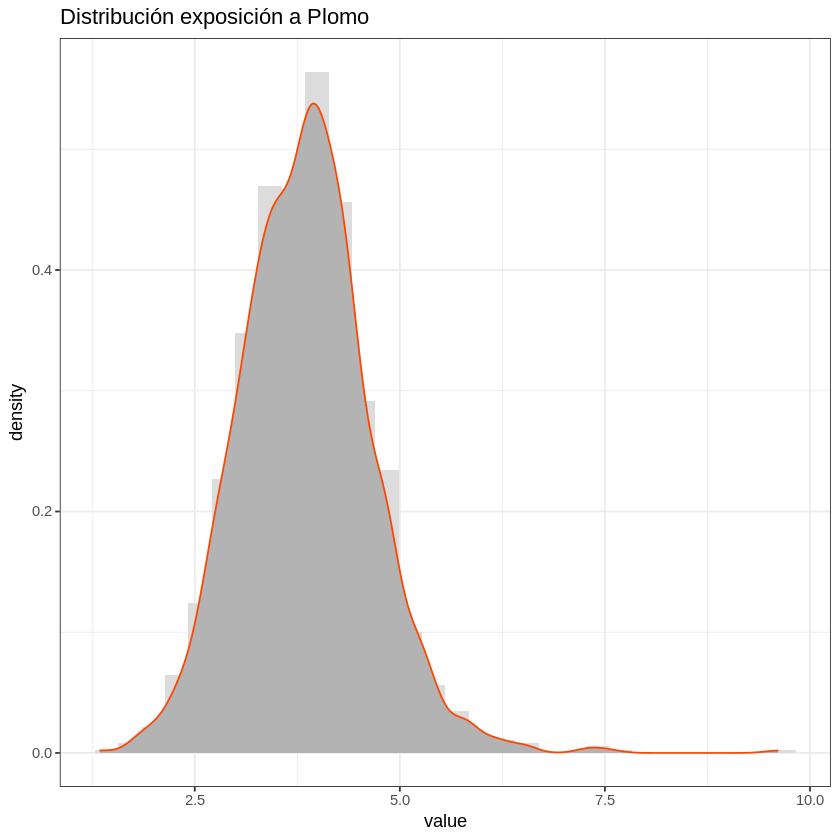

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


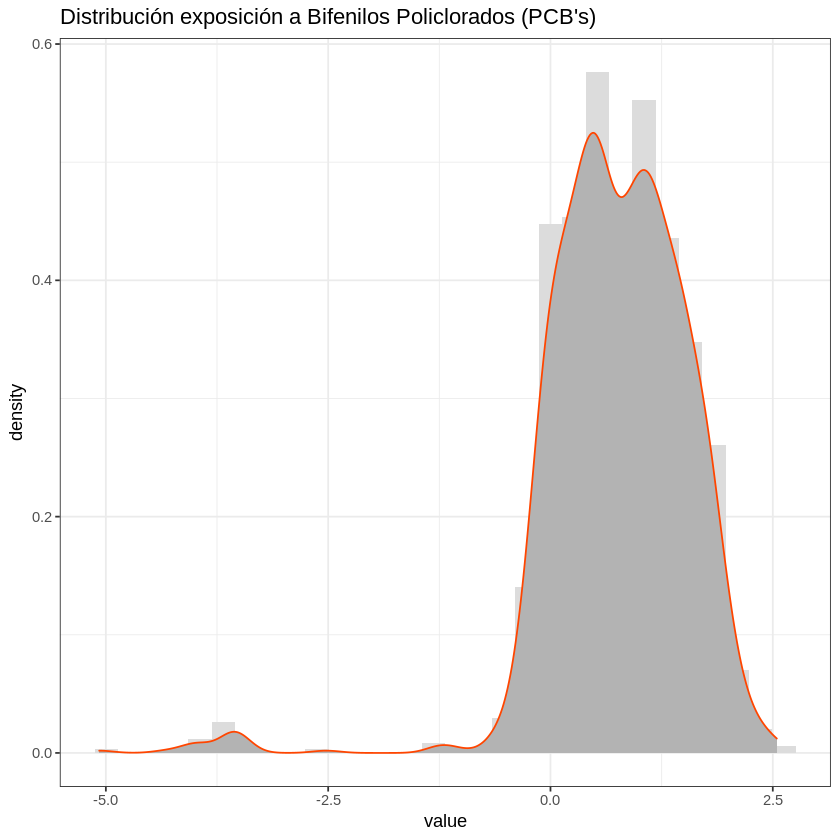

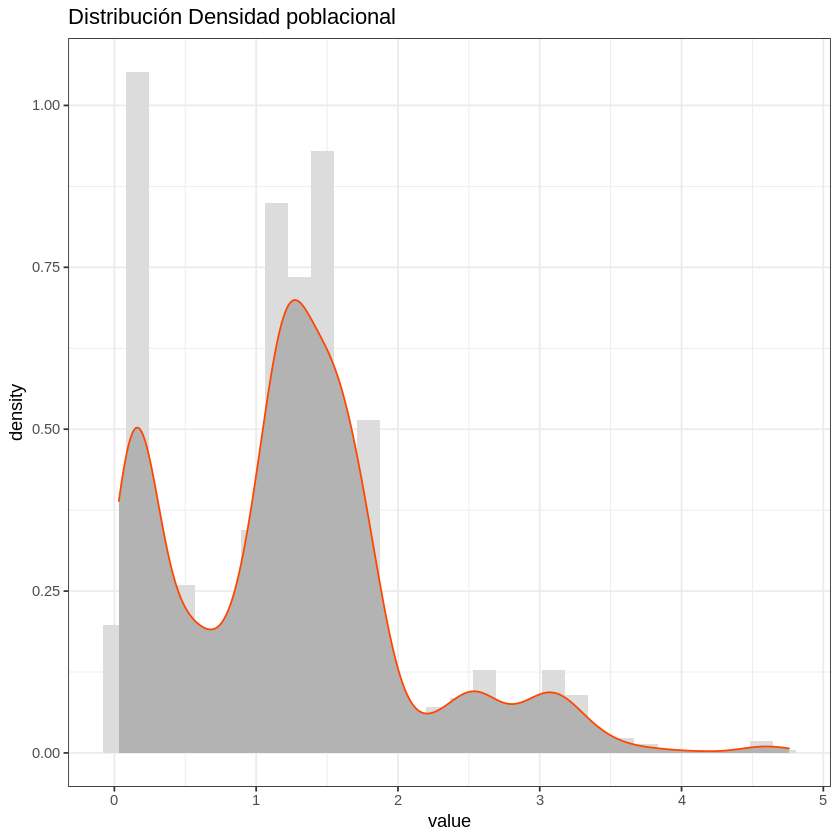

In [ ]:
rexposome::plotHistogram(exp, select = "hs_pb_c_Log2") + ggtitle("Distribución exposición a Plomo")  # Histograma pb
rexposome::plotHistogram(exp, select = "hs_pcb180_cadj_Log2") + ggtitle("Distribución exposición a Bifenilos Policlorados (PCB's)") # Histograma pcb180
rexposome::plotHistogram(exp, select = "hs_popdens_h_Sqrt") + ggtitle("Distribución Densidad poblacional") # Histograma densidad poblacional

* **Boxplots**.

Using the `plotFamily` function we can describe an exposure by family and stratify by group. Here are a few examples (you can try with other families)

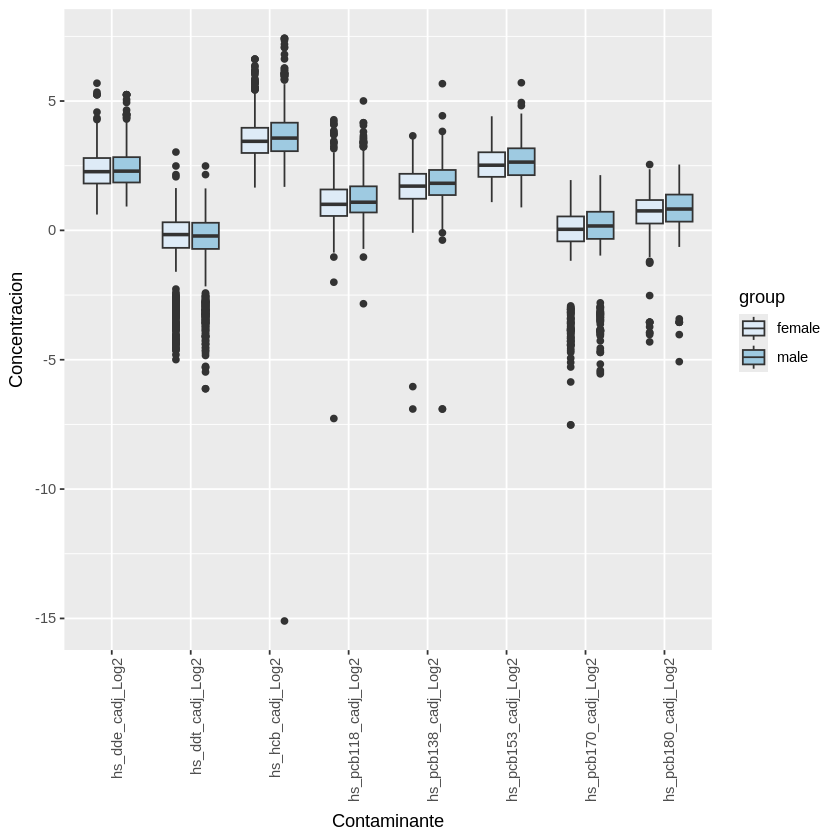

In [ ]:
# Organochlorine Contaminants stratified by Sex
rexposome::plotFamily(exp, family = "Organochlorines", group = "e3_sex_None") +
   xlab('Contaminante') +
   ylab('Concentracion')

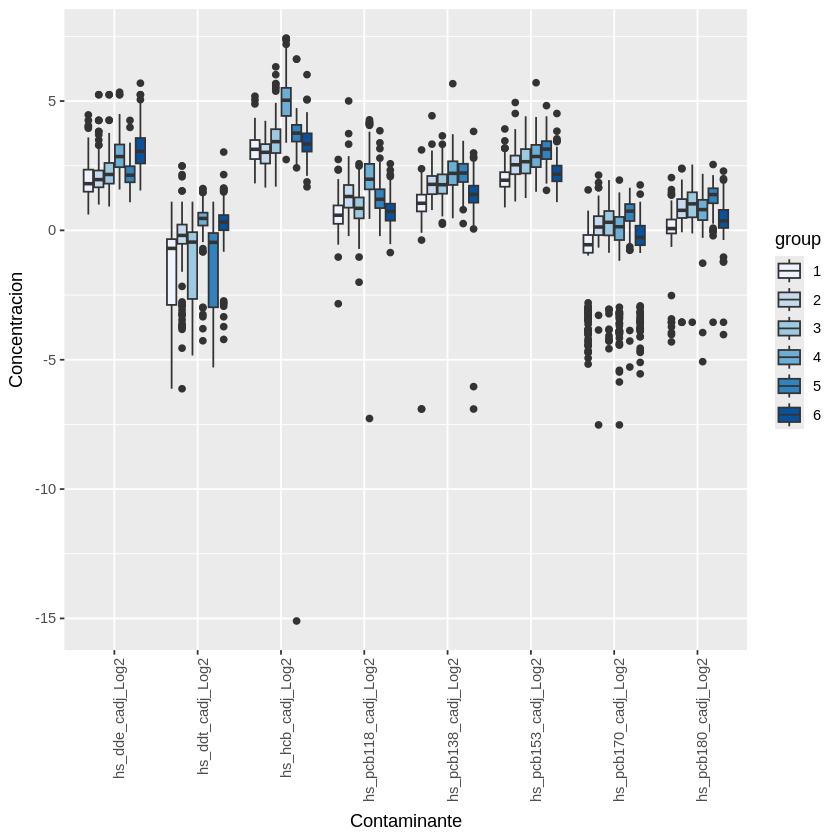

In [ ]:
# Organochlorine Contaminants stratified by Cohort
rexposome::plotFamily(exp, family = "Organochlorines", group = "h_cohort") +
                      xlab('Contaminante') +
                      ylab('Concentracion')

In [ ]:
# Indoor pollutants stratified by Cohort
#rexposome::plotFamily(exp, family = "Indoor air", group = "h_cohort")

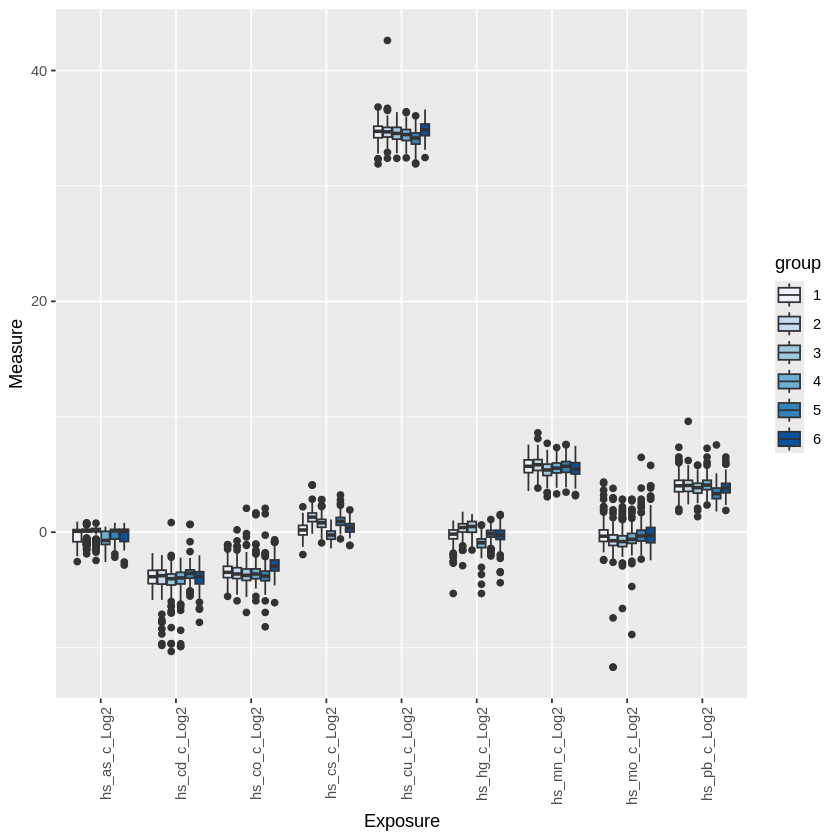

In [ ]:
# Metals levels in blood stratified by Cohort
rexposome::plotFamily(exp, family = "Metals", group = "h_cohort")

### **3.2.- Correlation between exposures**

Correlation between variables is an important thing to take into consideration when we want to do exposome analysis. To look at the intra- and inter-family correlation of different exposures, we will use the function `rexposome::correlation`.

In [ ]:
exp_cor <- rexposome::correlation(exp, use = "pairwise.complete.obs", method.cor = "spearman") # we can set pearson correlation as default method

In [ ]:
extract(exp_cor)[1:4, 1:4]

,hs_accesslines300_h_dic0,hs_accesslines300_s_dic0,hs_accesspoints300_h_Log,hs_accesspoints300_s_Log
hs_accesslines300_h_dic0,0.9974536,0.8710063,0.2994728,0.3298710
hs_accesslines300_s_dic0,0.8710063,0.9974857,0.2708063,0.3297577
hs_accesspoints300_h_Log,0.2994728,0.2708063,1.0000000,0.6331554
hs_accesspoints300_s_Log,0.3298710,0.3297577,0.6331554,1.0000000


We can visualise the correlation of all exposures in the exposome (from our dataset) using two types of plots with the `rexposome::plotCorrelation` function. By changing the type argument to `circos` or `matrix` we get a different plot.

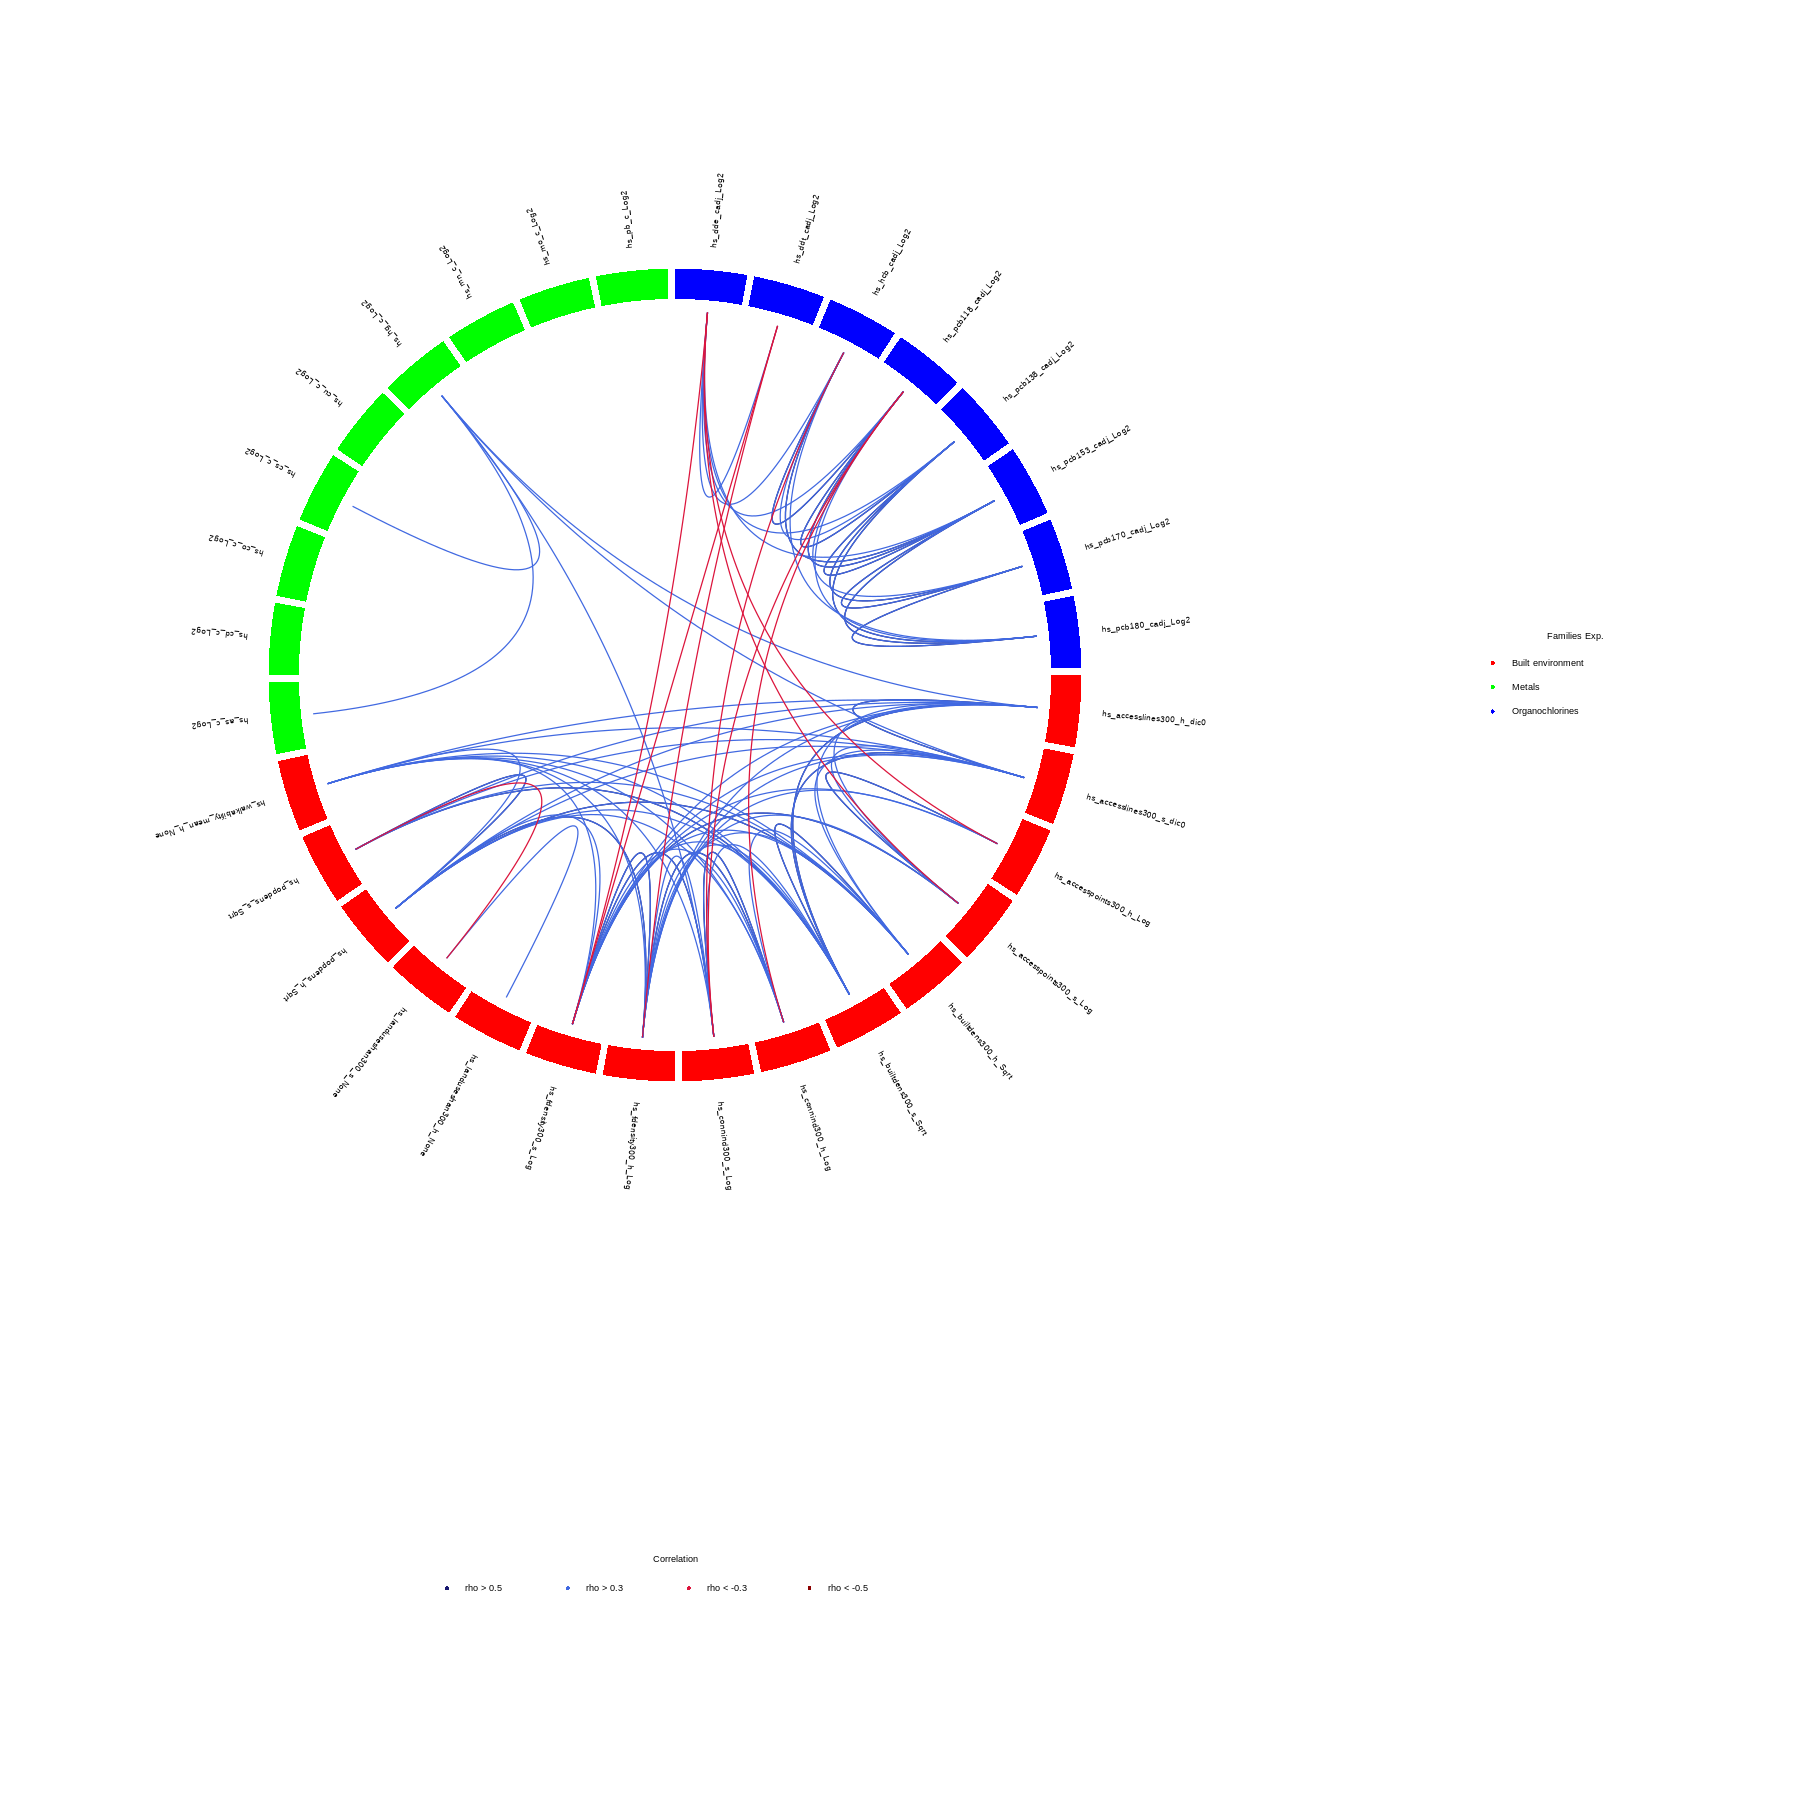

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)
rexposome::plotCorrelation(exp_cor, type = "circos")

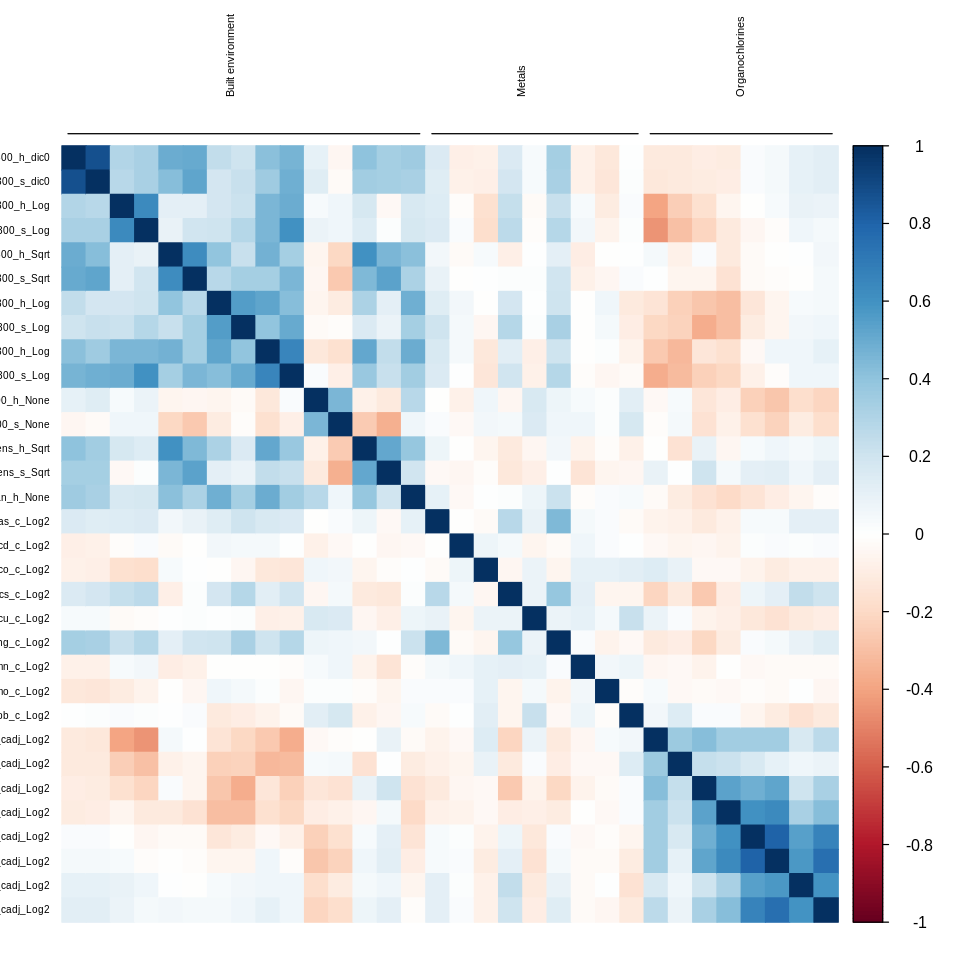

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
rexposome::plotCorrelation(exp_cor, type = "matrix")


### **3.3.- Principal Component Analysis (PCA)**

PCA is an unsupervised machine learning algorithm used for exploratory analysis and to reduce the dimensionality of data. To apply this analysis it is necessary that the exposures are previously standardised, for this the `rexposome` package has the `rexposome::standardize` function that prepares our data to later apply the PCA using the `rexposome::pca` function. After applying the PCA we can visualise our analysis using the `rexposome::plotPCA` function.

In [ ]:
dplyr::glimpse(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x570df8e51e10> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ featureData      :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ experimentData   :Formal class 'MIAME' [package "Biobase"] with 13 slots
  ..@ annotation       : chr(0) 
  ..@ protocolData     :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ .__classVersion__:Formal class 'Versions' [package "Biobase"] with 1 slot


In [ ]:
# We standardise the exposure variables of our exp object.
exp_std <- rexposome::standardize(exp, method = "normal")
exp_std

Warning message in rexposome::standardize(exp, method = "normal"):
“Given categorical exposures.”
Warning message in rexposome::standardize(exp, method = "normal"):
“Categorical exposures will not be standardized.”


Object of class 'ExposomeSet' (storageMode: environment)
 . exposures description:
    . categorical:  2 
    . continuous:  30 
 . exposures transformation:
    . categorical: 0 
    . transformed: 0 
    . standardized: 30 
    . imputed: 0 
 . assayData: 32 exposures 1301 individuals
    . element names: exp 
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . individuals: 1, ..., 998 
 . phenoData: 1301 individuals 13 phenotypes
    . individuals: 1, ..., 998 
    . phenotypes: hs_zbmi_who, ..., hs_child_age_None 
 . featureData: 32 exposures 17 explanations
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . descriptions: Family, ..., .imp 
experimentData: use 'experimentData(object)'
Annotation:  

In [ ]:
# We apply the PCA to our new standardised object exp_std
exp_pca <- rexposome::pca(exp_std)
exp_pca

Object of class 'ExposomePCA' (storageMode: environment)
 . num. prin. components: 10 
 . assayData: 32 exposures 1301 samples
    . element names: exp 
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . samples: 1, ..., 998 
 . phenoData: 1301 samples 13 phenotypes
    . samples: 1, ..., 998 
    . phenotypes: hs_zbmi_who, ..., hs_child_age_None 
 . featureData: 32 exposures 17 explanations
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . descriptions: Family, ..., .imp 

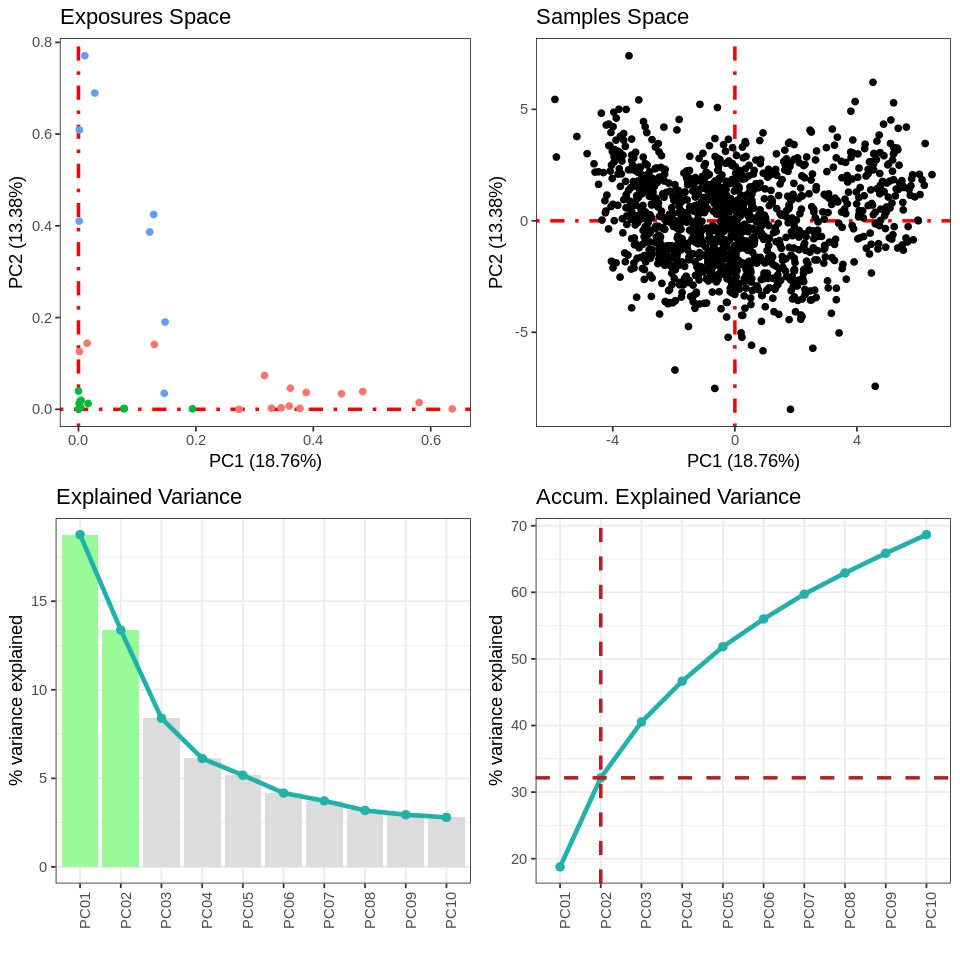

In [ ]:
# We visualise the results of the PCA
rexposome::plotPCA(exp_pca, set = "all")

***PCA Interpretation***

* **Exposures Space:** This plot represents the variability among the different exposures (i.e., the features or input variables). Each point in this space corresponds to a specific exposure. The position of each point on the PC1 and PC2 axes indicates how much variability of that feature is captured in those two principal components.

* **Samples Space:** This plot represents the variability among the different samples or subjects. Each point represents an observation (individuals in our example), and its position on the PC1 and PC2 axes indicates how much of the total variability of that sample is described by those two principal components.

* **Explained Variance:** This bar chart shows the percentage of the dataset’s total variance that is explained by each individual principal component. The first component (PC1) usually explains the largest portion of the variability, followed by the second (PC2), and so on. The height of each bar indicates how much variance each component explains.

* **Accum. Explained Variance:** This plot indicates how much total variability has been captured after summing each successive principal component. For example, the variance explained by PC1 + PC2 together, then PC1 + PC2 + PC3, and so on.

In **summary**, we can conclude from our **PCA** analysis:

**1.** PC1 explains 18.76% of the total variance, while PC2 explains 13.39%.  
**2.** The exposures (exposome features) cluster in specific regions in the exposure space, indicating that some features are similar to each other.  
**3.** The individuals in the sample space cluster densely around a central area, with some groups of points scattered, which could indicate possible patterns within the data (clusters).  








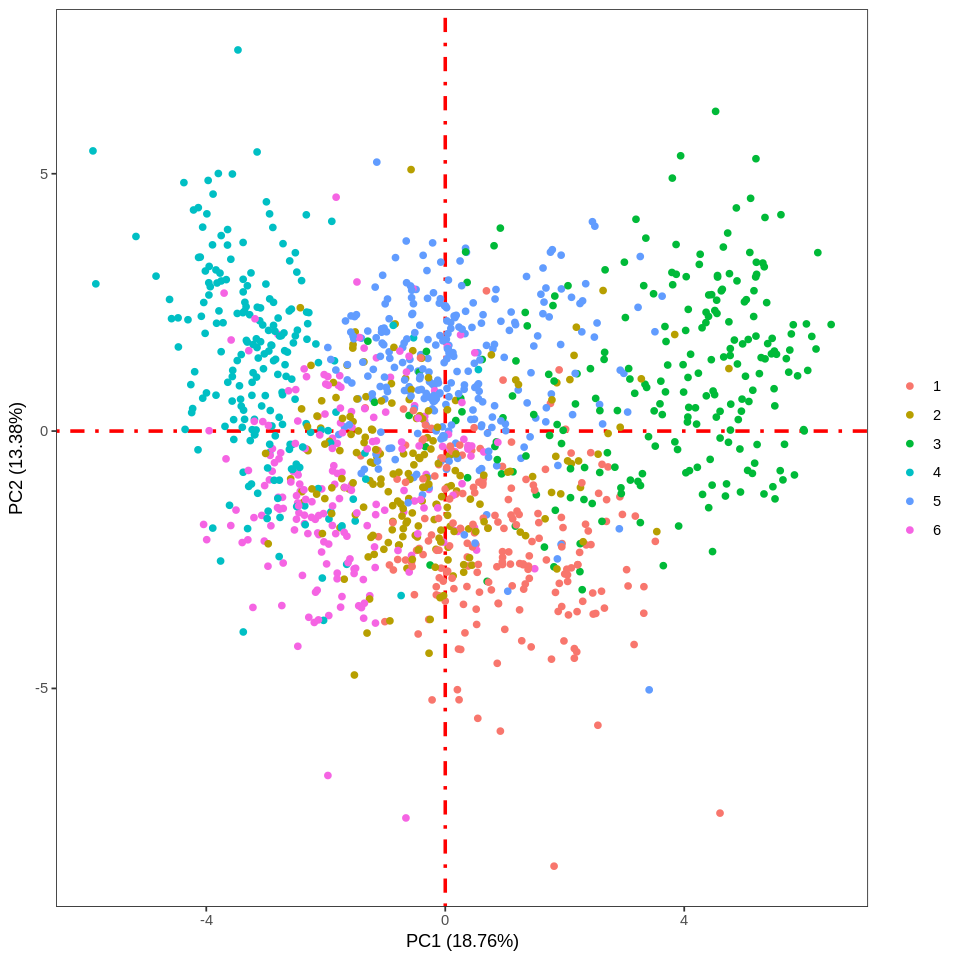

In [ ]:
rexposome::plotPCA(exp_pca, set = "samples", phenotype = "h_cohort")

**PCA interpretation - cohort**

In the graph we can see that the observations of the different cohorts overlap to a large extent, but there are also areas where certain observations tend to cluster more densely. Although we see some clustering or grouping of observations, there is significant overlap between the points, **which may indicate that differences between cohorts are not the main sources of variation in this dataset**. This type of graph is useful to visualise how the samples relate to each other in terms of their variability and how they are distributed in terms of a category of interest, in this case the cohort variable.

## **4.- Exposome association analysis** <a name=‘association’></a> <a name=‘association’></a>.
Once the exposome variables we want to study have been explored and described, we can look at the association between the different exposures and health outcomes using different approaches:.


### **4.1.- Exposome-Wide association analysis (ExWAS)**

The ExWAS method is an approach that allows us to deal with high-dimensionality data. This method tests the association of each of the exposures with the health outcome of interest, adjusting for confounding variables (but not for co-exposure effects), and additionally allows us to control for multiple testing. In order to control for multiple testing, we need to compute the effective number of tests (considering correlation among predictors) and apply a p-value correction method. The ExWAS method can be applied through the `rexposome::exwas` function.

In [ ]:
exwas <- rexposome::exwas(exp, formula = hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None, family = "gaussian")
exwas

An object of class 'ExWAS'

       ~ hs_zbmi_who h_cohort + e3_sex_None + e3_yearbir_None 

Tested exposures:  32 
Threshold for effective tests (TEF):  2.58e-03 
 . Tests < TEF: 1 
Robust standar errors: Computed

In [ ]:
# We obtain the threshold for the effective number of tests (multiple testing): corrected p-value
rexposome::tef(exwas)

[1] 0.002578272

In [ ]:
rexposome::extract(exwas)

In [ ]:
exwas_result <- round(as.data.frame(extract(exwas)),6)
View(exwas_result)

,pvalue,effect,X2.5,X97.5
,<dbl>,<dbl>,<dbl>,<dbl>
hs_pcb153_cadj_Log2,0.000000,-0.601448,-0.700145,-0.502751
hs_pcb170_cadj_Log2,0.000000,-0.267357,-0.316641,-0.218073
hs_pcb138_cadj_Log2,0.000000,-0.394363,-0.471809,-0.316917
hs_pcb180_cadj_Log2,0.000000,-0.410830,-0.492683,-0.328976
hs_hcb_cadj_Log2,0.000000,-0.266632,-0.329649,-0.203616
hs_dde_cadj_Log2,0.000000,-0.378716,-0.471500,-0.285933
hs_pcb118_cadj_Log2,0.000000,-0.244863,-0.319822,-0.169905
hs_accesslines300_s_dic0,0.000000,0.530678,0.353632,0.707725
hs_accesslines300_h_dic0,0.000000,0.514561,0.338675,0.690448


In [ ]:
# We select the exposures that have a p-value lower than the tef
exwas_result[exwas_result$pvalue<tef(exwas),]

,pvalue,effect,X2.5,X97.5
,<dbl>,<dbl>,<dbl>,<dbl>
hs_pcb153_cadj_Log2,0.000000,-0.601448,-0.700145,-0.502751
hs_pcb170_cadj_Log2,0.000000,-0.267357,-0.316641,-0.218073
hs_pcb138_cadj_Log2,0.000000,-0.394363,-0.471809,-0.316917
hs_pcb180_cadj_Log2,0.000000,-0.410830,-0.492683,-0.328976
hs_hcb_cadj_Log2,0.000000,-0.266632,-0.329649,-0.203616
hs_dde_cadj_Log2,0.000000,-0.378716,-0.471500,-0.285933
hs_pcb118_cadj_Log2,0.000000,-0.244863,-0.319822,-0.169905
hs_accesslines300_s_dic0,0.000000,0.530678,0.353632,0.707725
hs_accesslines300_h_dic0,0.000000,0.514561,0.338675,0.690448


Using the `rexposome::plotExwas` function we can visualise the exwas results using a Manhattan plot. This type of plot is particularly useful as it allows us to visualise the statistical association through the p-value grouped by the different exposure families. It is important to mention that the Manhattan plot only shows the p-values, but no metric of the effect of the exposures is shown.

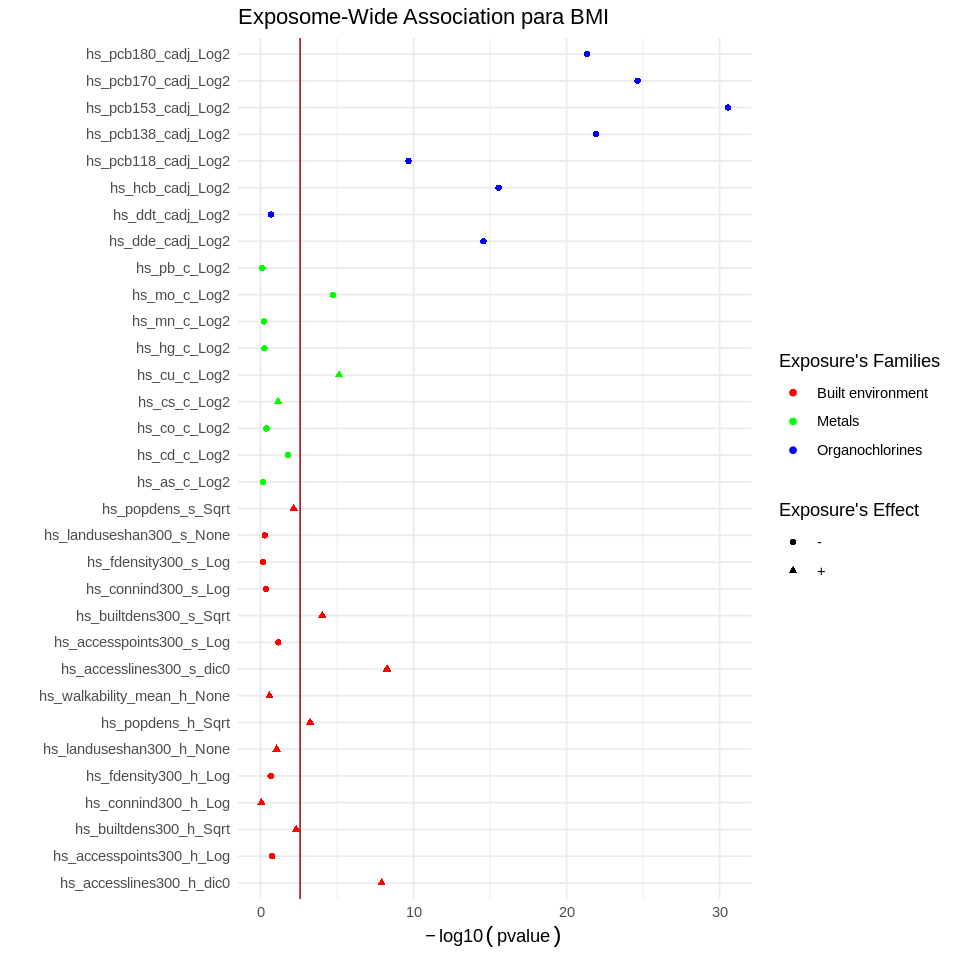

In [ ]:
clr <- rainbow(length(familyNames(exp)))
names(clr) <- familyNames(exp)

rexposome::plotExwas(exwas, color = clr, show.effective = TRUE,
          exp.order=expo.list) +
  ggtitle("Exposome-Wide Association para BMI")

*   **Question 1:** <font color='red'> **Is ExWas analysis controlled by multiple testing?** </font> <font color='green'> **Yes, we can define it explicitly in the function and all derived p-values will be corrected for multiple testing. This correction can be done according to the total number of analyses or, considering just the effective number of tests (considering correlation)** </font>



*   **Question 2:** <font color='red'> **If a participant is exposed to PCB153, can we say that if he/she is also exposed to PCB118, will his/her BMI be reduced?** </font> <font color='green'> **ExWAS does not tell us anything about co-exposure effects and co-ocurrence of events. It just looks at the association between each individual exposure and the health outcome (adjusted for potential confounders) independently** </font>


Using the `rexposome::plotEffect` function we can see the estimated effect for a given model, in this case the effect of postnatal exposures of the selected families (Built environment, Metals, Organochlorines) on BMI.

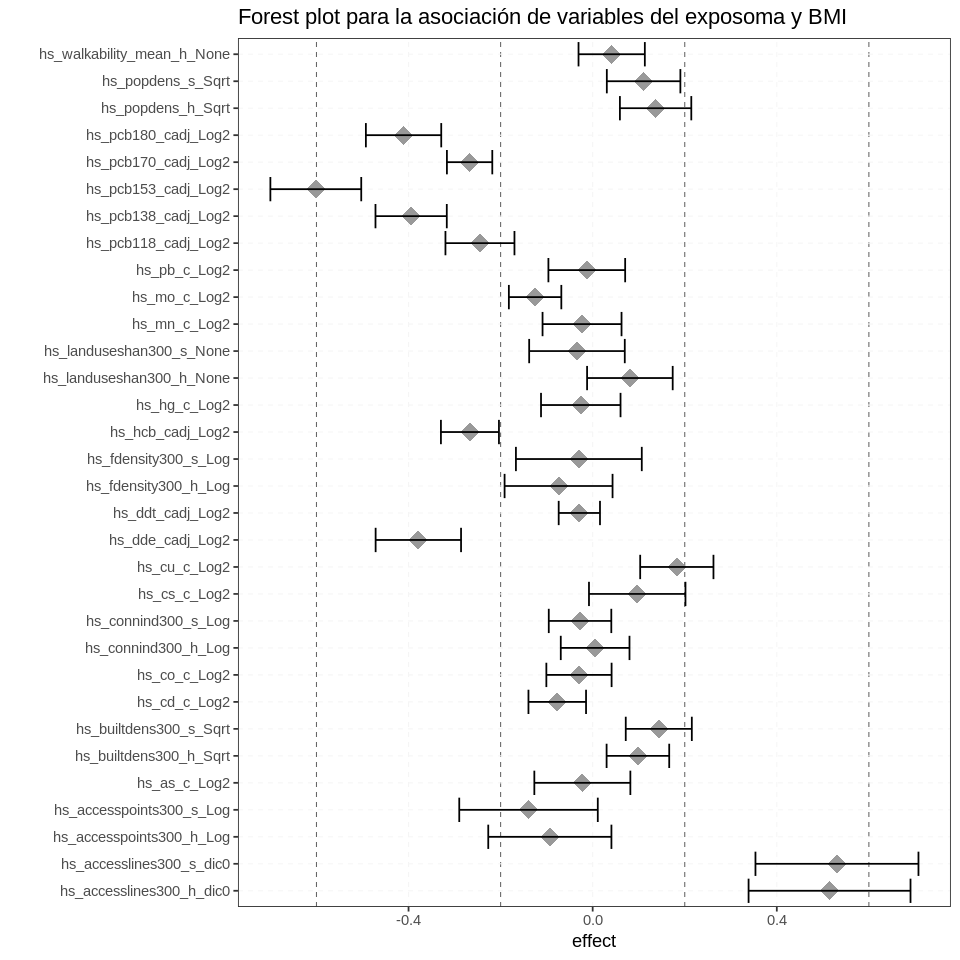

In [ ]:
rexposome::plotEffect(exwas) + ggtitle("Forest plot para la asociación de variables del exposoma y BMI")

Another way to visualise the ExWAS results is by means of a volcano-plot, this type of graph is more illustrative as it combines the visualisation techniques taught above. This type of graph shows the p-value and effect size of the different exposures with the studied health outcome (BMI). The volcano-plot can be generated using the function `rexposome::volcanoPlot`.

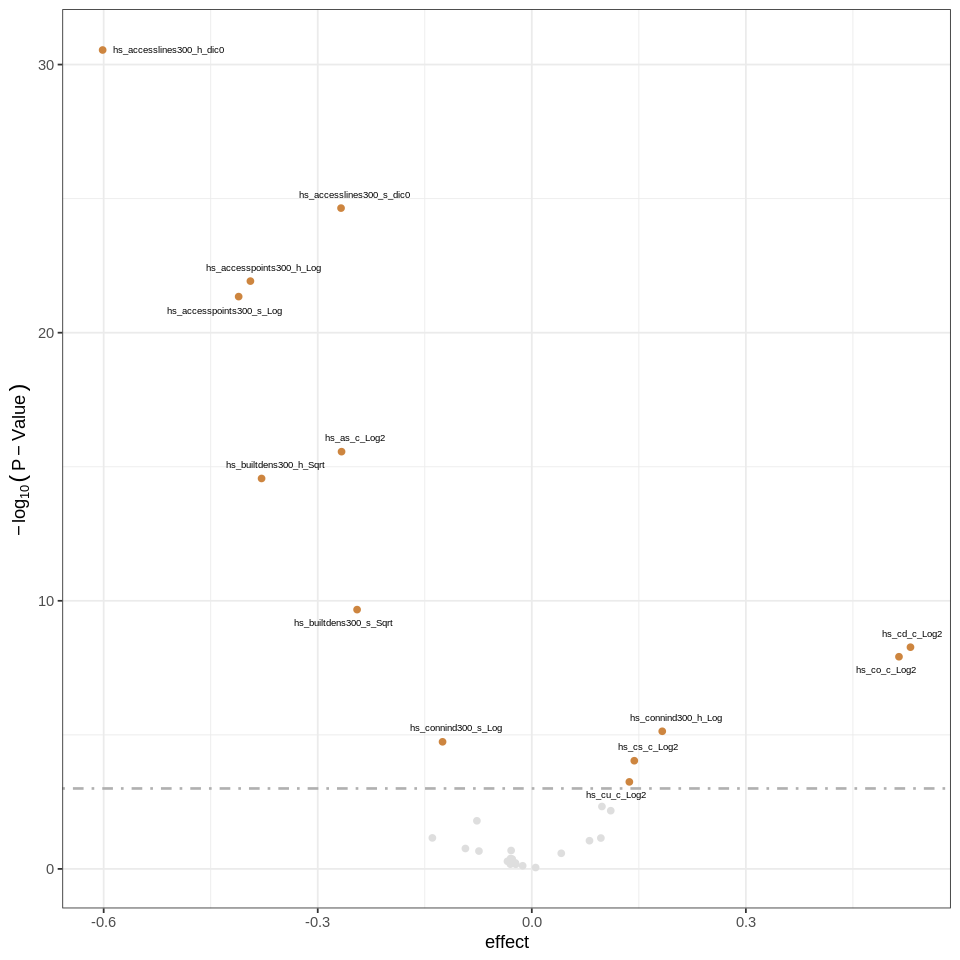

In [ ]:
rexposome::plotVolcano(exwas)

### **4.2.- Methods for variable selection**
Variable selection techniques are generally performed automatically by algorithms (widely used in high dimensional problems). In principle these techniques allow us to discriminate those variables or exposures that are not associated with a health outcome. These variable selection methods are implemented in other libraries, some of them are: `Mass`, `Caret`, `DSA`, `Mass`, `Caret` and `DSA`.


* ** Stepwise selection:** This selection technique uses a sequence of steps to allow predictor variables to enter or exit a regression model one at a time (generating multiple models). Often, this procedure converges on a subset of variables. Entry and exit criteria are commonly based on the significance of the p-value. The significance of the characteristics is ranked according to their individual ability to explain the variation in the outcome.






In [ ]:
set.seed(234) # we need to define a seed to find reproducible results everytime we run the algorithm
full.model <- lm(hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None +
                   hs_accesslines300_h_dic0 + hs_accesspoints300_h_Log +
                   hs_builtdens300_h_Sqrt + hs_connind300_h_Log +
                   hs_fdensity300_h_Log + hs_landuseshan300_h_None +
                   hs_popdens_h_Sqrt + hs_walkability_mean_h_None +
                   hs_accesslines300_s_dic0 + hs_accesspoints300_s_Log +
                   hs_builtdens300_s_Sqrt + hs_connind300_s_Log +
                   hs_fdensity300_s_Log + hs_landuseshan300_s_None +
                   hs_popdens_s_Sqrt + hs_as_c_Log2 +
                   hs_cd_c_Log2 + hs_co_c_Log2 + hs_cs_c_Log2 +
                   hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mn_c_Log2 +
                   hs_mo_c_Log2 + hs_pb_c_Log2 + hs_dde_cadj_Log2 +
                   hs_ddt_cadj_Log2 + hs_hcb_cadj_Log2+
                   hs_pcb118_cadj_Log2 + hs_pcb138_cadj_Log2+
                   hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2 +
                   hs_pcb180_cadj_Log2,
                 data = data)

In [ ]:
step.model <- stepAIC(full.model, direction = "both",
                      trace = FALSE,
                      scope = list(lower = ~ h_cohort + e3_sex_None + e3_yearbir_None))

In [ ]:
# inspect model results with the summary order
summary(step.model)


Call:
lm(formula = hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None + 
    hs_fdensity300_h_Log + hs_popdens_h_Sqrt + hs_accesspoints300_s_Log + 
    hs_cs_c_Log2 + hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mo_c_Log2 + 
    hs_pb_c_Log2 + hs_dde_cadj_Log2 + hs_hcb_cadj_Log2 + hs_pcb118_cadj_Log2 + 
    hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6604 -0.6715 -0.0348  0.6512  3.5459 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.63227    1.41767  -1.857 0.063576 .  
h_cohort2                 0.50608    0.29397   1.722 0.085391 .  
h_cohort3                 1.34331    0.22622   5.938 3.71e-09 ***
h_cohort4                 0.88197    0.16891   5.222 2.07e-07 ***
h_cohort5                 0.76452    0.21720   3.520 0.000447 ***
h_cohort6                 0.55264    0.16886   3.273 0.001094 ** 
e3_sex_Nonemale           0.19688    0.05866   3.356 0.000814 ***
e3_ye

* **Elastic net:** This technique is based on the combination of LASSO and Ridge penalisation methods, with the aim of overcoming some of their limitations. Because in the presence of correlated variables LASSO tends to select one variable from a group and ignore the rest and Ridge selects some variables with similar magnitudes, a good compromise is achieved when using Elastic net. The penalty parameters are optimised using the cross-validation procedure (which can lead to problems of instability in the results).


In [ ]:
# We define the predictor variables of the model (basically all exposures and covariates).
x <- model.matrix(hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None +
                    hs_accesslines300_h_dic0 + hs_accesspoints300_h_Log +
                    hs_builtdens300_h_Sqrt + hs_connind300_h_Log +
                    hs_fdensity300_h_Log + hs_landuseshan300_h_None +
                    hs_popdens_h_Sqrt + hs_walkability_mean_h_None +
                    hs_accesslines300_s_dic0 + hs_accesspoints300_s_Log +
                    hs_builtdens300_s_Sqrt + hs_connind300_s_Log +
                    hs_fdensity300_s_Log + hs_landuseshan300_s_None +
                    hs_popdens_s_Sqrt + hs_as_c_Log2 +
                    hs_cd_c_Log2 + hs_co_c_Log2 + hs_cs_c_Log2 +
                    hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mn_c_Log2 +
                    hs_mo_c_Log2 + hs_pb_c_Log2 + hs_dde_cadj_Log2 +
                    hs_ddt_cadj_Log2 + hs_hcb_cadj_Log2+
                    hs_pcb118_cadj_Log2 + hs_pcb138_cadj_Log2+
                    hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2 +
                    hs_pcb180_cadj_Log2, data)[,-1]


In [ ]:
pen.fac <- c(rep(0,12),rep(1,ncol(x)-12))

In [ ]:
set.seed(123)
model <- train(x=x, y=data$hs_zbmi_who,
  method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10, penalty.factor=pen.fac
)


In [ ]:
# Best tuning parameter
model$bestTune

# Coefficient of the final model. You need
# to specify the best lambda
coef(model$finalModel, model$bestTune$lambda)

,alpha,lambda
,<dbl>,<dbl>
9,0.1,0.1284352


45 x 1 sparse Matrix of class "dgCMatrix"
                                      s1
(Intercept)                -2.2629389915
h_cohort2                   0.6122160028
h_cohort3                   1.3478411924
h_cohort4                   0.9999768034
h_cohort5                   0.7939952226
h_cohort6                   0.7135643495
e3_sex_Nonemale             0.1851492993
e3_yearbir_None2004        -0.2443820238
e3_yearbir_None2005        -0.1489583779
e3_yearbir_None2006        -0.1398704150
e3_yearbir_None2007         0.2171047737
e3_yearbir_None2008         0.3210794845
e3_yearbir_None2009         0.6322938405
hs_accesslines300_h_dic0    .           
hs_accesspoints300_h_Log   -0.0039204657
hs_builtdens300_h_Sqrt      .           
hs_connind300_h_Log         .           
hs_fdensity300_h_Log       -0.0201272364
hs_landuseshan300_h_None   -0.0066952763
hs_popdens_h_Sqrt           0.0689061184
hs_walkability_mean_h_None -0.0045176735
hs_accesslines300_s_dic0    .           
hs_accesspoints

Variables that have a **dot (.)** instead of a coefficient have been excluded by the method; these coefficients have been reduced to zero and are not part of the final model. This indicates that, according to the model, they do not provide information that would significantly improve the predictive ability of the model given the current regularisation parameters and the information contained in the other variables.

* **Deletion Substitution Addition (DSA):** It is a technique based on multiple iterations using cross-validation, where a variable is removed, substituted or added to the model. Like the previous technique it is subject to unstable results.

In [ ]:
# install/load DSA package
pacman::p_load(partDSA)

In [ ]:
control <- DSA.control(vfold=1)  # we define that we are not going to do cross-validation

In [ ]:
# Estimated execution time: approx. 20 seconds.

model_dsa <- partDSA(x, data$hs_zbmi_who, control = control)

In [ ]:
print(model_dsa)

partDSA object
# partitions   test risk
1              1.414760   
2              1.277574   
3              1.224445   
4              1.190492   
5              1.167892   
6              1.151205   
7              1.134648   
8              1.119117   
9              1.105395   
10             1.092893   

Outcome:
Best of 1 partitions:
   Part.1 
    0.403
Best of 2 partitions:
   Part.1    Part.2 
    1.073    0.198
Best of 3 partitions:
   Part.1    Part.2    Part.3 
    1.073    0.382    -0.179
Best of 4 partitions:
   Part.1    Part.2    Part.3    Part.4 
    1.073    0.158    -0.179    0.677
Best of 5 partitions:
   Part.1    Part.2    Part.3    Part.4    Part.5 
    0.94    0.158    -0.179    0.677    1.8
Best of 6 partitions:
   Part.1    Part.2    Part.3    Part.4    Part.5    Part.6 
    0.94    0.158    -0.179    0.87    1.8    0.288
Best of 7 partitions:
   Part.1    Part.2    Part.3    Part.4    Part.5    Part.6    Part.7 
    0.807    0.158    -0.179    0.87    1.8    

In [ ]:
summary(model_dsa)

In [ ]:
model_dsa$var.importance

,COG=1,COG=2,COG=3,COG=4,COG=5,COG=6,COG=7,COG=8,COG=9,COG=10
h_cohort2,0,0,0,0,0,0,0,0,0,0
h_cohort3,0,0,0,0,0,0,0,0,0,0
h_cohort4,0,0,0,0,0,0,0,0,0,0
h_cohort5,0,0,0,0,0,0,0,0,0,0
h_cohort6,0,0,0,0,2,2,3,3,4,5
e3_sex_Nonemale,0,0,0,0,0,0,0,0,0,0
e3_yearbir_None2004,0,0,0,0,0,0,0,0,0,0
e3_yearbir_None2005,0,0,0,0,0,0,0,0,0,0
e3_yearbir_None2006,0,0,0,0,0,0,0,0,0,0
e3_yearbir_None2007,0,0,0,0,0,0,0,0,0,0


**Variables selected by the algorithm: **

hs_popdens_h_Sqrt  
hs_builtdens300_s_Sqrt  
hs_landuseshan300_s_None    
hs_dde_cadj_Log2    
hs_hcb_cadj_Log2    
hs_pcb170_cadj_Log2   

*   **Question 3:** <font color='red'> **¿Which of the following methods give more conservative results?** </font>

1. ExWas
2. Stepwise
3. Elastic net
<font color='green'>
4. DSA </font>

*   **Question 4:** <font color='red'> **Were some of the variables selected by various selection methods, would you select these six variables for your regression model?** </font>  <font color='green'> Yes, if the variables have been selected by different methods, which have different goodness of fit and particularities, they are likely to be exposures of interest.</font>

### **4.3.- Clustering** ###

The identification of exposure patterns is of particular interest in exposome studies. Using clustering techniques in exposome studies we try to identify groups or clusters of subjects that share similar exposure profiles and check whether these exposures are associated with a health outcome.


In [ ]:
# Estimated execution time: 48 seconds approx.

pacman::p_load(cluster, factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ggsci’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘dendextend’, ‘ggpubr’



factoextra installed



In [ ]:
# We center the exposures by cohort.
expo3 <- expo2
for (i in 2:length(expo2)) {
  mean_y <- with(expo3, {mean_y = ave(expo2[,i],data$h_cohort,FUN=mean)} )
  expo3[,i] <- expo3[,i] - mean_y
}

In clustering techniques such as K-means, cluster centres are calculated as the average of the points belonging to each cluster. If the data are not centered, differences in means between cohorts can bias these centres and thus the assignment of points to clusters. Centering the data helps to avoid this bias.

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


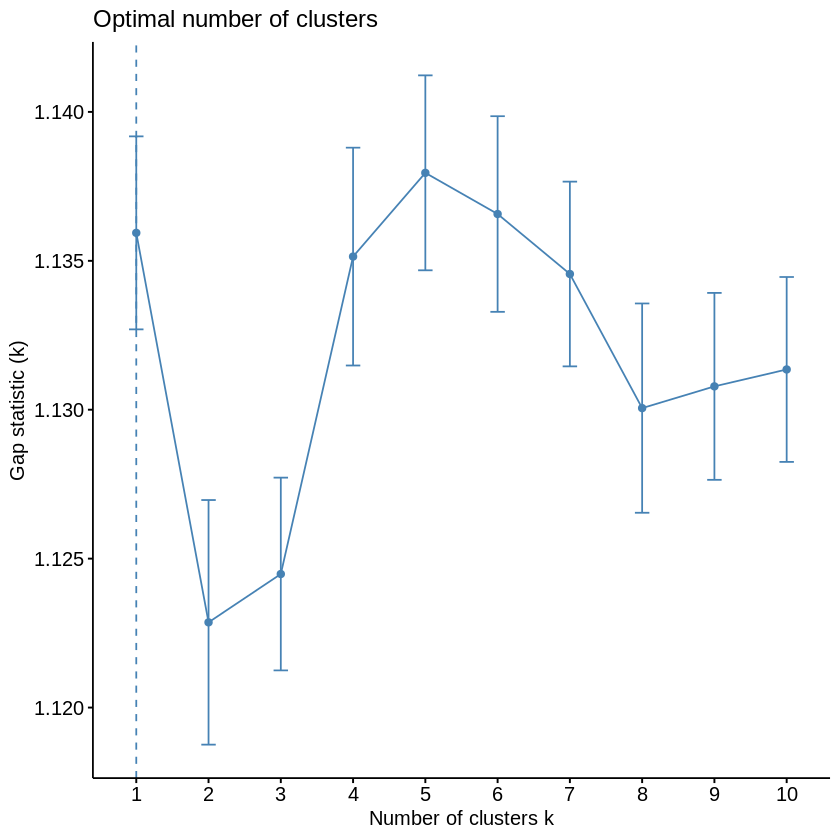

In [ ]:
fviz_nbclust(expo3[,-1], kmeans, method = "gap_stat")

The optimal number of clusters is at the point where the Gap statistic reaches its maximum value before it starts to decrease.

*   **Question 5:** <font color='red'> **What number of clusters would you select based on the Gap statistic?** </font> <font color='green'> The optimal number of clusters in this dataset is **two** </font>


In [ ]:
set.seed(111)
km.res <- kmeans(expo3[,-1], centers = 5, nstart = 25)
clus.means <- aggregate(expo3[,-1], by=list(cluster=km.res$cluster), mean)

In [ ]:
clus.means

cluster,hs_accesslines300_h_dic0,hs_accesspoints300_h_Log,hs_builtdens300_h_Sqrt,hs_connind300_h_Log,hs_fdensity300_h_Log,hs_landuseshan300_h_None,hs_popdens_h_Sqrt,hs_walkability_mean_h_None,hs_accesslines300_s_dic0,⋯,hs_mo_c_Log2,hs_pb_c_Log2,hs_dde_cadj_Log2,hs_ddt_cadj_Log2,hs_hcb_cadj_Log2,hs_pcb118_cadj_Log2,hs_pcb138_cadj_Log2,hs_pcb153_cadj_Log2,hs_pcb170_cadj_Log2,hs_pcb180_cadj_Log2
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.068027858,0.06802020,0.69053652,0.4911977705,0.27533155,-0.0183001617,0.52348608,0.50550886,0.051551076,⋯,0.422542712,0.09456716,0.07767365,0.5742655,0.06264613,0.06836281,0.11238437,0.07342858,0.37420082,0.14324516
2,-0.020889568,-0.02595335,-0.25926275,-0.2014307698,-0.12698967,-0.0005243344,-0.19518171,-0.21444220,-0.017076649,⋯,0.003746554,-0.03475683,-0.25616668,0.4275617,-0.28609620,-0.31110064,-0.31337829,-0.32139918,0.01065758,-0.30305792
3,-0.024699837,0.00849659,-0.16511225,-0.1126206812,-0.03953440,-0.0293309397,-0.17357374,-0.12045291,-0.024200337,⋯,-0.288081899,0.00881397,0.46828682,0.6667916,0.55480700,0.55617521,0.61278847,0.57537721,0.82875684,0.57684104
4,-0.005119143,-0.01651478,0.02372510,0.0305189412,0.04071501,0.0127606602,-0.02897997,0.14986281,0.004525342,⋯,-0.150498147,0.16155591,-0.29401009,-0.2458563,-0.35779723,-0.42873273,-0.64319126,-0.35985907,-3.28181948,-0.63367765
5,0.004265192,-0.02835575,-0.02838431,-0.0004678197,-0.01933819,0.0580466007,0.07202262,-0.04260316,0.009320802,⋯,0.020320044,-0.13601733,-0.10648825,-2.3548131,-0.12287846,-0.04340003,-0.05746925,-0.09343581,0.08636792,-0.06511702


Additionally, we can see how many subjects each cluster is composed of or by some other variable.

In [ ]:
table(km.res$cluster)


  1   2   3   4   5 
239 425 312 113 212 

In [ ]:
table(km.res$cluster, data$h_cohort) # miramos el cluster y la cohorte a la que pertenecen

   
     1  2  3  4  5  6
  1 31 42 46 25 46 49
  2 41 80 68 76 88 72
  3 47 55 40 73 54 43
  4 39  3 11 28  5 27
  5 44 18 59  5 79  7

We can visualise the exposome patterns in the different clusters previously identified.


* **Cluster 1 (N = 239):** They live in populated, dense, trafficable areas; exposed to Mo and DDT.

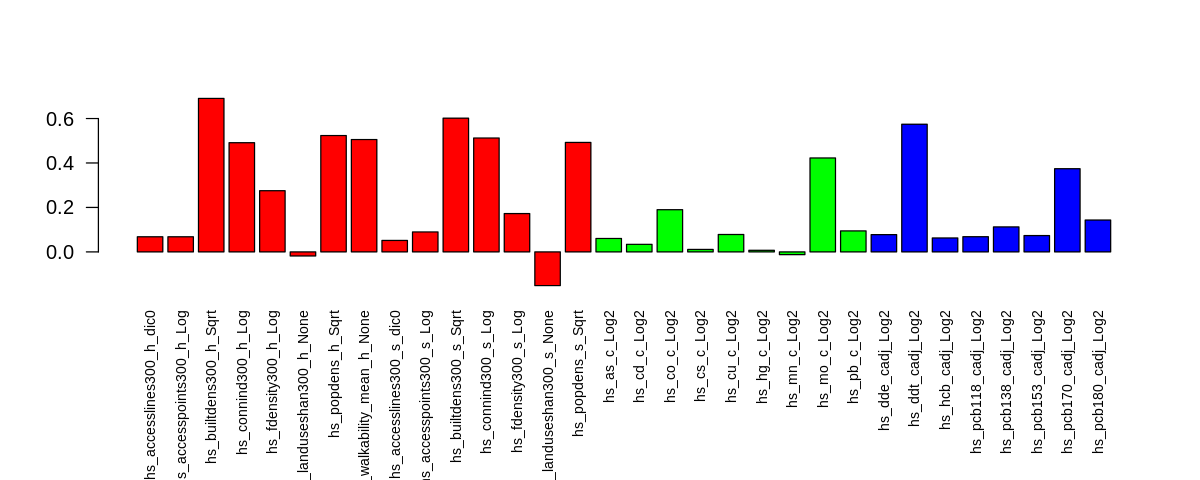

In [ ]:
options(repr.plot.width=10, repr.plot.height=4) # definimos el tamaño del gráfico en colab
par(mar = c(8, 4, 4, 2) + 0.1)  # c(bottom, left, top, right) ajustamos los margenes
barplot(as.numeric(clus.means[1,2:ncol(clus.means)]),
        col=c(rep("red",15),rep("green",9),rep("blue",8)),
        names.arg=names(clus.means)[-1],
        cex.names=.7,
        las=2,
        srt=90)

* **Cluster 2 (N = 425):** High exposure to DDT but low exposure to other organochlorines; Low population density (possibly rural).

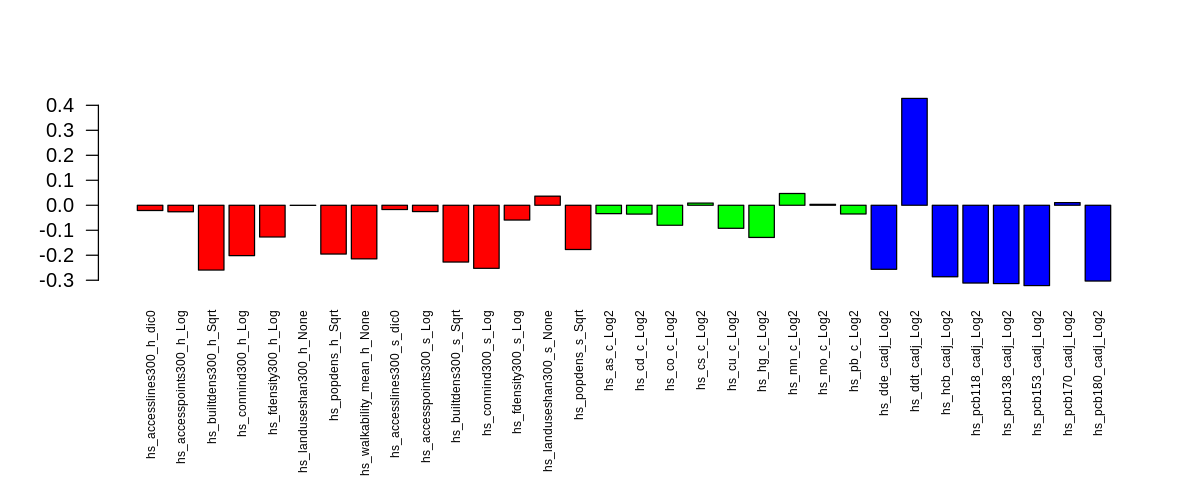

In [ ]:
options(repr.plot.width=10, repr.plot.height=4) # we define the size of the graph for colab
par(mar = c(8, 4, 4, 2) + 0.1)  # c(bottom, left, top, right) we adjust the margings
barplot(as.numeric(clus.means[2,2:ncol(clus.means)]), col=c(rep("red",15),rep("green",9),rep("blue",8)),
        names.arg=names(clus.means)[-1],
        cex.names=.6,
        las=2,
        srt=90)

* **Cluster 3 (N = 113):** Lower exposure to PCB170.

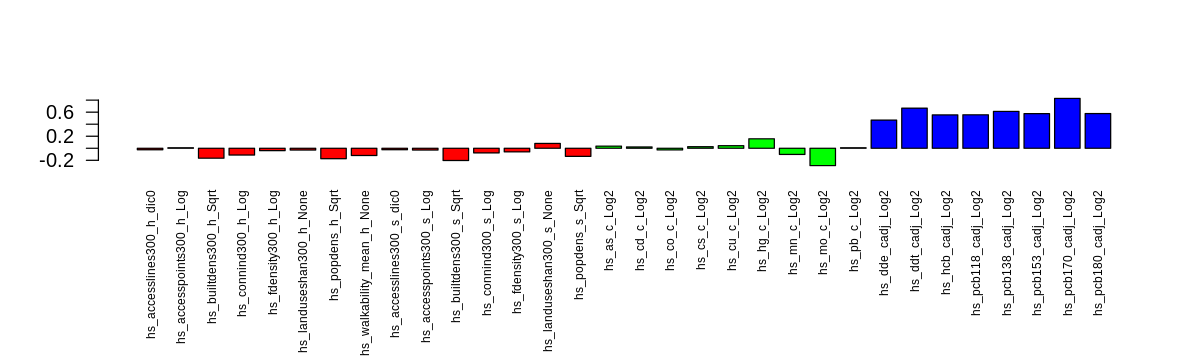

In [ ]:
options(repr.plot.width=10, repr.plot.height=3) # we define the size of the graph for colab
par(mar = c(8, 4, 4, 2) + 0.1)  # c(bottom, left, top, right) adjust the margings
barplot(as.numeric(clus.means[3,2:ncol(clus.means)]), col=c(rep("red",15),rep("green",9),rep("blue",8)),
        names.arg=names(clus.means)[-1],
        cex.names=.6, las=2, srt=90)

* **Cluster 4 (N = 312):** Highly exposed to all organochlorines

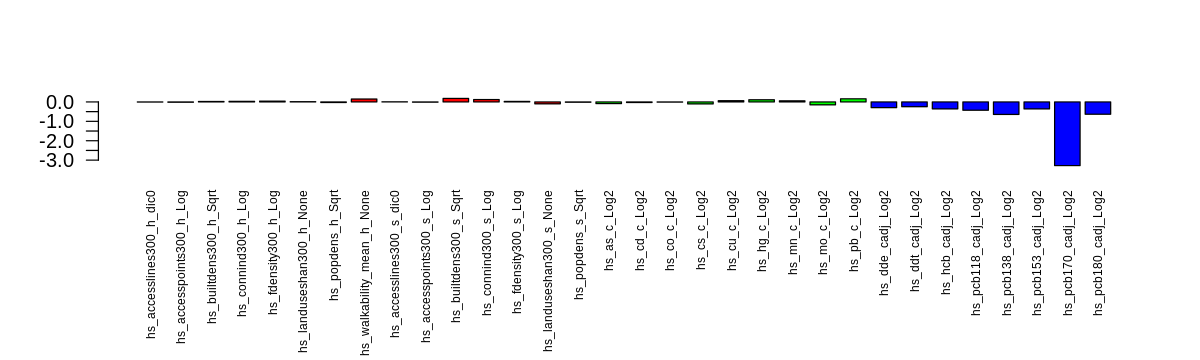

In [ ]:
options(repr.plot.width=10, repr.plot.height=3) #  we define the size of the graph for colab
par(mar = c(8, 4, 4, 2) + 0.1)  # c(bottom, left, top, right) adjust the margins
barplot(as.numeric(clus.means[4,2:ncol(clus.means)]), col=c(rep("red",15),rep("green",9),rep("blue",8)),
names.arg=names(clus.means)[-1],
        cex.names=.6, las=2, srt=90)

* **Cluster 5 (N = 212):** Lower exposure to DDT

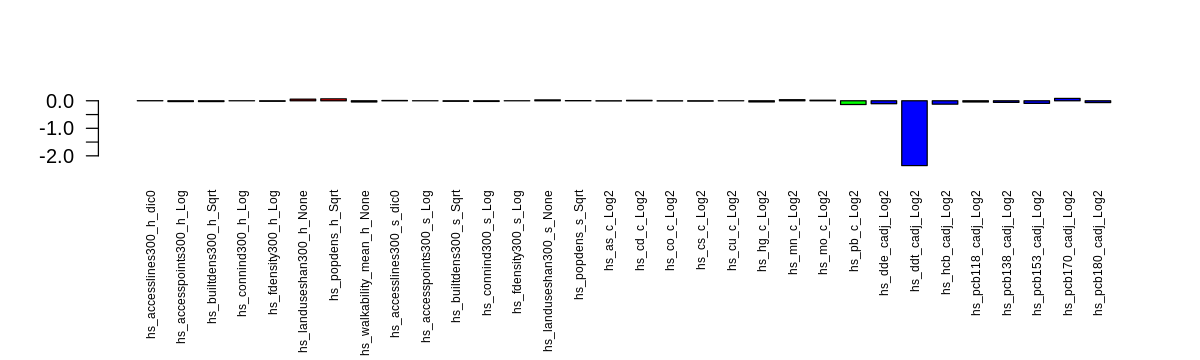

In [ ]:
options(repr.plot.width=10, repr.plot.height=3) # we set the graph size
par(mar = c(8, 4, 4, 2) + 0.1)  # c(bottom, left, top, right) we adjust the margings
barplot(as.numeric(clus.means[5,2:ncol(clus.means)]), col=c(rep("red",15),rep("green",9),rep("blue",8)),
names.arg=names(clus.means)[-1],
        cex.names=.6, las=2, srt=90)

Finally, we can explore the association of each of the clusters with the health outcome of interest by adjusting for some covariates of interest.

In [ ]:
mod_cluster <- lm(hs_zbmi_who ~ as.factor(km.res$cluster) + h_cohort + e3_sex_None + e3_yearbir_None, data = data) # ajustamos por cohorte, sexo y año de nacimiento
summary(mod_cluster)


Call:
lm(formula = hs_zbmi_who ~ as.factor(km.res$cluster) + h_cohort + 
    e3_sex_None + e3_yearbir_None, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7247 -0.7393 -0.0751  0.7175  3.8131 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.31055    0.34124  -0.910  0.36296    
as.factor(km.res$cluster)2  0.44636    0.09062   4.926 9.51e-07 ***
as.factor(km.res$cluster)3 -0.19275    0.09686  -1.990  0.04681 *  
as.factor(km.res$cluster)4  0.90059    0.13091   6.879 9.37e-12 ***
as.factor(km.res$cluster)5  0.26706    0.10806   2.471  0.01359 *  
h_cohort2                   0.38921    0.29804   1.306  0.19182    
h_cohort3                   0.95897    0.23162   4.140 3.69e-05 ***
h_cohort4                   0.35031    0.11296   3.101  0.00197 ** 
h_cohort5                   0.24656    0.21464   1.149  0.25090    
h_cohort6                   0.50678    0.11340   4.469 8.56e-06 ***
e3_sex_Nonemale      

In [ ]:
# Estimated execution time: 60 secs aprox.
pacman::p_load(dotwhisker)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘datawizard’, ‘insight’, ‘prediction’, ‘parameters’, ‘margins’, ‘ggstance’



dotwhisker installed



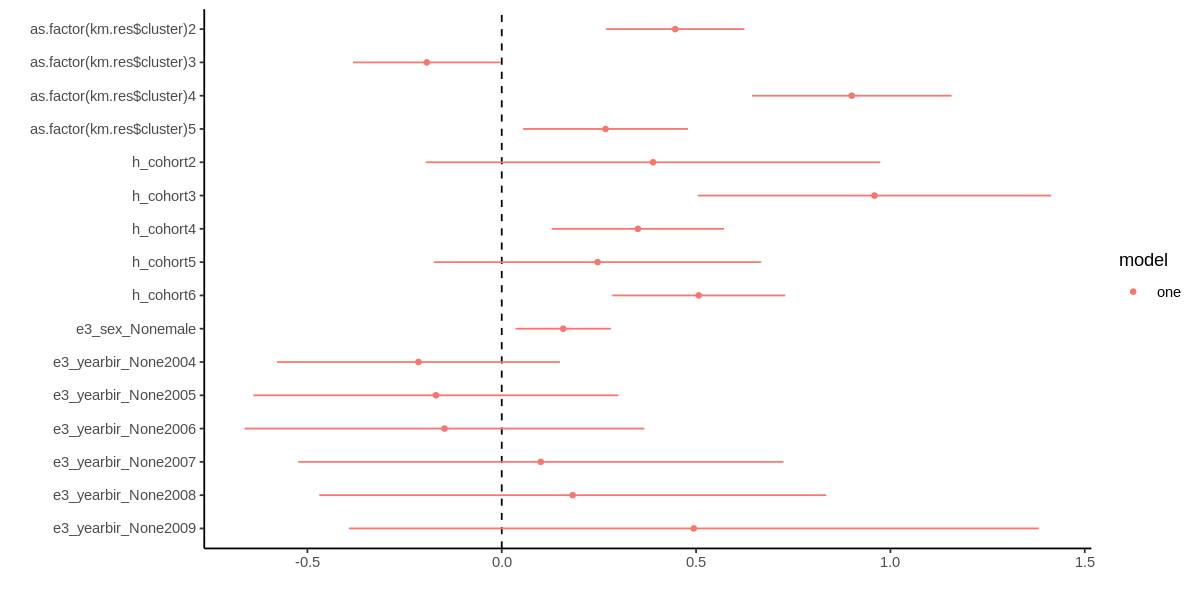

In [ ]:
options(repr.plot.width=10, repr.plot.height=5) # define the size of the graph in collab
# we wrap our function to remove warnings in collab
suppressWarnings(dotwhisker::dwplot(mod_cluster, vline = geom_vline(
           xintercept = 0,
           colour = "black",
           linetype = 2)) + theme_classic())

In the regression results we can see that belonging to **cluster 2**, **cluster 3** and **cluster 4** is associated with an increase in BMI, depending on the cluster we select as reference.   


### **4.4.- Mixture Analysis**

The main idea in mixtures analysis is that low levels of exposure to a given pollutant may produce no health effects (or effects too small to be detected), but combined exposure to multiple pollutants may generate an effect.

Commonly used approaches in environmental epidemiology fail to capture the complexity of assessing the combined effect of multiple exposures due to some limitations:

* They do not assess the joint effect of multiple exposures.
* They do not consider the interaction between different exposures.
* They face a high correlation between exposures.

Therefore more sophisticated methods are needed to investigate the health effects of mixtures or multiple exposures. In recent years several methods have been proposed to estimate the independent and joint effects of multiple exposures.

The **selection** of the right **method** in **mixture analysis** should be guided by the **research question** we want to answer (please, take a look on the figure below from Joubert et al. (2022) DOI: 10.3390/ijerph19031378).

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/PRIME.png?raw=1" alt="ISGlobal logo" width="500"/>  

In this section we will review two methods for mixture analysis.

**1. Weighted Quantile Sum Regression (WQS)**  
**2. Bayesian Kernel Machine Regression (BKMR)**   

**Note:** Mixture analysis is very time consuming. Therefore, this section will show the code necessary to perform the analysis and the interpretation of the results, without running the cells.  



With the following line we install the necessary packages to perform the mix analysis.

In [ ]:
# We install/load the necessary packages to perform the analysis.
pacman::p_load(gWQS, bkmr, MASS)

To **facilitate the interpretation** of the results we will use only the organochlorine family for the mixture analysis.

In [ ]:
codebook$family

[1] Air Pollution                             
  [2] Air Pollution                             
  [3] Air Pollution                             
  [4] Air Pollution                             
  [5] Air Pollution                             
  [6] Air Pollution                             
  [7] Air Pollution                             
  [8] Air Pollution                             
  [9] Air Pollution                             
 [10] Air Pollution                             
 [11] Air Pollution                             
 [12] Air Pollution                             
 [13] Air Pollution                             
 [14] Air Pollution                             
 [15] Air Pollution                             
 [16] Air Pollution                             
 [17] Built environment                         
 [18] Built environment                         
 [19] Built environment                         
 [20] Built environment                         
 [21] Built environment                         
 [22] Built environment                         
 [23] Built environment                         
 [24] Built environment                         
 [25] Built environment                         
 [26] Built environment                         
 [27] Built environment                         
 [28] Built environment                         
 [29] Built environment                         
 [30] Built environment                         
 [31] Built environment                         
 [32] Built environment                         
 [33] Built environment                         
 [34] Built environment                         
 [35] Built environment                         
 [36] Built environment                         
 [37] Built environment                         
 [38] Built environment                         
 [39] Built environment                         
 [40] Built environment                         
 [41] Indoor air                                
 [42] Indoor air                                
 [43] Indoor air                                
 [44] Indoor air                                
 [45] Indoor air                                
 [46] Lifestyle                                 
 [47] Lifestyle                                 
 [48] Lifestyle                                 
 [49] Lifestyle                                 
 [50] Lifestyle                                 
 [51] Lifestyle                                 
 [52] Lifestyle                                 
 [53] Lifestyle                                 
 [54] Lifestyle                                 
 [55] Lifestyle                                 
 [56] Lifestyle                                 
 [57] Lifestyle                                 
 [58] Lifestyle                                 
 [59] Lifestyle                                 
 [60] Lifestyle                                 
 [61] Lifestyle                                 
 [62] Lifestyle                                 
 [63] Lifestyle                                 
 [64] Lifestyle                                 
 [65] Lifestyle                                 
 [66] Lifestyle                                 
 [67] Lifestyle                                 
 [68] Lifestyle                                 
 [69] Lifestyle                                 
 [70] Lifestyle                                 
 [71] Lifestyle                                 
 [72] Lifestyle                                 
 [73] Lifestyle                                 
 [74] Lifestyle                                 
 [75] Lifestyle                                 
 [76] Lifestyle                                 
 [77] Lifestyle                                 
 [78] Lifestyle                                 
 [79] Lifestyle                                 
 [80] Lifestyle                                 
 [81] Lifestyle                                 
 [82] Lifestyle                  

In [ ]:
# We make a subset of the expolist using only organochlorine compounds.
expo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines") &
                                                  codebook$period == "Postnatal"]) # Here we change the period of exposure to the Prenatal stage.
expo.list

[1] "hs_dde_cadj_Log2"      "hs_ddt_cadj_Log2"      "hs_hcb_cadj_Log2"     
[4] "hs_pcb118_cadj_Log2"   "hs_pcb138_cadj_Log2"   "hs_pcb153_cadj_Log2"  
[7] "hs_pcb170_cadj_Log2"   "hs_pcb180_cadj_Log2"   "hs_sumPCBs5_cadj_Log2"

In [ ]:
expo2 <- exposome[ ,c("ID", expo.list)]

In [ ]:
dat <- cbind(hs_zbmi_who = phenotype[ ,4],  # select the 4th column of the phenotype dataframe and name it hs_zbmi_who
             covariates[ ,2:13])  # we select from columns 2 to 13 of the dataframe covariates

# Then, combine both into one data frame
data <- data.frame(expo2, dat)

* **Weighted Quantile Sum Regression (WQS)**.

It is a method that operates in a supervised learning framework, creating a single score (the weighted quantile sum) that summarises the overall exposure to the mixture and includes this score in a regression model. It aims to assess the overall effect of the mixture on the health outcome of interest. The score is calculated as a weighted sum (so that exposures with weaker effects on the outcome have less weight in the index) of all exposures categorised into quartiles, or more groups, so that outliers have less impact on the weight estimate.

In [ ]:
mod_wqs <- gwqs(hs_zbmi_who ~ wqs + h_cohort + e3_sex_None + e3_yearbir_None, mix_name = expo.list, data = data,
                q = 10, validation = 0.6, b = 100, b1_pos = FALSE,
                b1_constr = FALSE, family = "gaussian", seed = 2016)

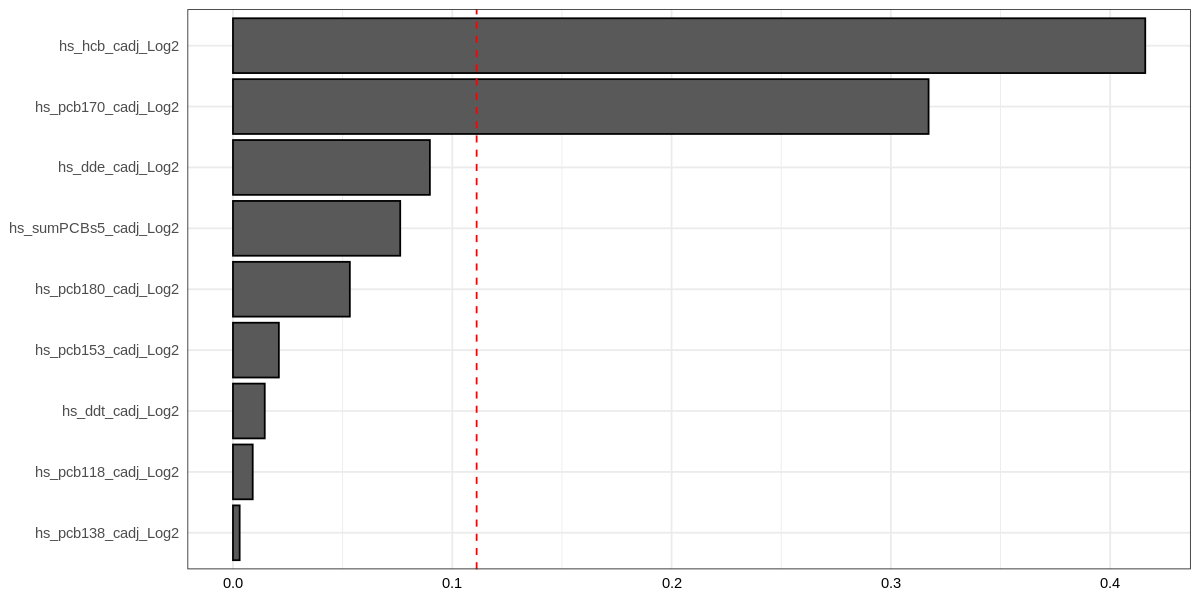

In [ ]:
options(repr.plot.width=10, repr.plot.height=5) # set graph dimensions
gwqs_barplot(mod_wqs)

In [ ]:
summary(mod_wqs)


Call:
gwqs(formula = hs_zbmi_who ~ wqs + h_cohort + e3_sex_None + e3_yearbir_None, 
    data = data, mix_name = expo.list, b = 100, b1_pos = FALSE, 
    b1_constr = FALSE, q = 10, validation = 0.6, family = "gaussian", 
    seed = 2016)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6321  -0.7213  -0.0245   0.6600   3.4428  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.35323    0.41557   0.850  0.39560    
wqs                 -0.25831    0.02053 -12.581  < 2e-16 ***
h_cohort2            0.86323    0.37104   2.327  0.02025 *  
h_cohort3            1.68176    0.29439   5.713 1.59e-08 ***
h_cohort4            1.26101    0.16560   7.615 7.76e-14 ***
h_cohort5            1.24147    0.27997   4.434 1.06e-05 ***
h_cohort6            0.74550    0.14034   5.312 1.42e-07 ***
e3_sex_Nonemale      0.21955    0.07739   2.837  0.00468 ** 
e3_yearbir_None2004 -0.46223    0.22398  -2.064  0.03938 *  
e3_yearbir_None2005 -0.

`geom_smooth()` using formula = 'y ~ x'


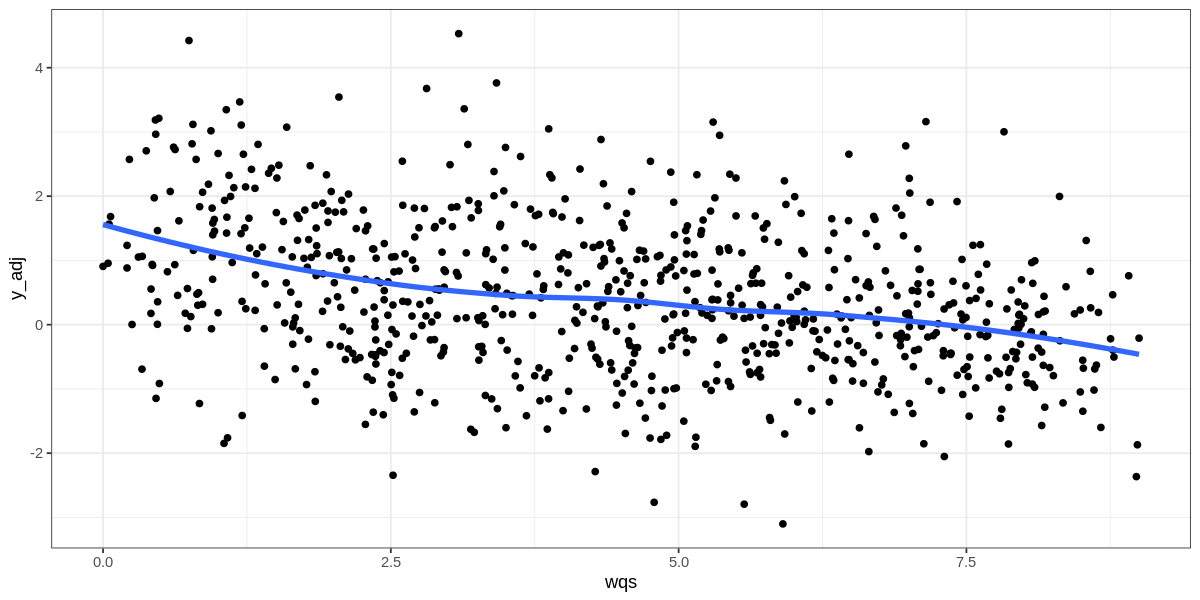

In [ ]:
options(repr.plot.width=10, repr.plot.height=5) # set graph dimensions
gwqs_scatterplot(mod_wqs)

Participants in the top deciles of the selected exposures are those associated with lower BMI.

*   **Question 6:** <font color='red'> **Does this model take into consideration possible interactions?** </font> <font color='green'> No, this model does not account for interactions since it consider an additive model when computing the index </font>

* **Bayesian Kernel Machine Regression (BKMR)**  

It is a method designed to address in a flexible and non-parametric way, several objectives such as; **1. Detection and estimation of the overall effect of the mixture** ; **2. Identification of the pollutant or group of pollutants responsible for the observed mixture effects** ; **3. Visualisation of the exposure-response function** ; **4. Detection of interactions between individual pollutants**.







In [ ]:
expo.list

[1] "hs_dde_cadj_Log2"      "hs_ddt_cadj_Log2"      "hs_hcb_cadj_Log2"     
[4] "hs_pcb118_cadj_Log2"   "hs_pcb138_cadj_Log2"   "hs_pcb153_cadj_Log2"  
[7] "hs_pcb170_cadj_Log2"   "hs_pcb180_cadj_Log2"   "hs_sumPCBs5_cadj_Log2"

In [ ]:
# We define a new dataframe using the data from the data object, previously used in the analysis.
X = data.frame(cohort2=as.numeric(data$h_cohort==2), cohort3=as.numeric(data$h_cohort==3),cohort4=as.numeric(data$h_cohort==4),
               cohort5=as.numeric(data$h_cohort==5), cohort6=as.numeric(data$h_cohort==6), female=as.numeric(data$e3_sex_None=="female"),
               year2004=as.numeric(data$e3_yearbir_None==2004), year2005=as.numeric(data$e3_yearbir_None==2005),
               year2006=as.numeric(data$e3_yearbir_None==2006), year2007=as.numeric(data$e3_yearbir_None==2007),
               year2008=as.numeric(data$e3_yearbir_None==2008), year2009=as.numeric(data$e3_yearbir_None==2009))

 <font color='red'> **ALERT!!!! This process takes approximately 50 minutes**. </font> ❗❗❗❗❗❗







In [ ]:
# Estimated execution time: 50 minutes
set.seed(111)
fitkm <- kmbayes(y = data$hs_zbmi_who, Z = data[,expo.list], X = X,
                 iter = 10000, verbose = FALSE, varsel = TRUE)

Iteration: 1000 (10% completed; 5.88109 mins elapsed)

Iteration: 2000 (20% completed; 11.68314 mins elapsed)

Iteration: 3000 (30% completed; 18.08196 mins elapsed)

Iteration: 4000 (40% completed; 25.01526 mins elapsed)

Iteration: 5000 (50% completed; 31.99395 mins elapsed)

Iteration: 6000 (60% completed; 38.36822 mins elapsed)

Iteration: 7000 (70% completed; 44.40513 mins elapsed)

Iteration: 8000 (80% completed; 50.71053 mins elapsed)

Iteration: 9000 (90% completed; 56.35971 mins elapsed)

Iteration: 10000 (100% completed; 1.06306 hours elapsed)



In [ ]:
# Objeto que contiene
fitkm

Fitted object of class 'bkmrfit'
Iterations: 10000 
Outcome family: gaussian  
Model fit on: 2023-11-08 21:13:52.415214 

When using several iterations, it is important to assess the convergence of the parameters. By looking at the convergence plots we can verify this (we expect random behaviour around the straight line). What we usually observe is an initial ‘burning’ phase, which we should eliminate from the analysis.

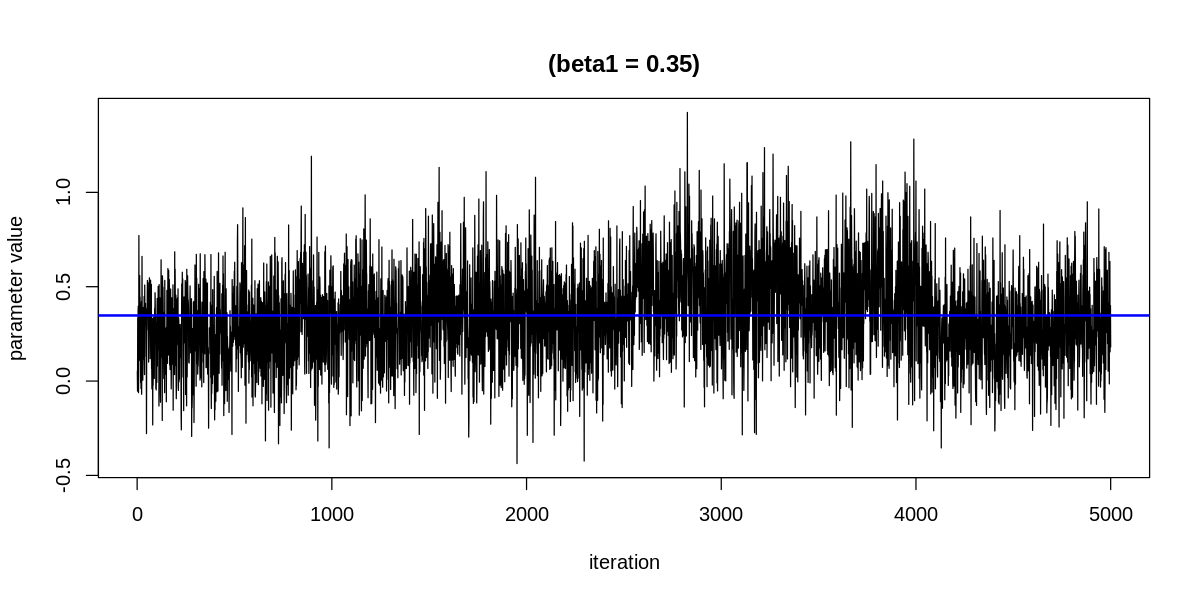

In [ ]:
bkmr::TracePlot(fit = fitkm, par = "beta")

Additionally we can inspect the probability of subsequent inclusion using `bkmr::ExtractPIPs`.

In [ ]:
bkmr::ExtractPIPs(fitkm)

variable,PIP
<chr>,<dbl>
hs_dde_cadj_Log2,0.7776
hs_ddt_cadj_Log2,0.6440
hs_hcb_cadj_Log2,1.0000
hs_pcb118_cadj_Log2,0.4892
hs_pcb138_cadj_Log2,0.3814
hs_pcb153_cadj_Log2,0.3560
hs_pcb170_cadj_Log2,1.0000
hs_pcb180_cadj_Log2,0.2106
hs_sumPCBs5_cadj_Log2,0.2820


To obtain the exposure-response function for each predictor/exposure we use `bkmr::PredictorResponseUnivar`.

In [ ]:
pred.resp.univar <- bkmr::PredictorResponseUnivar(fit = fitkm)

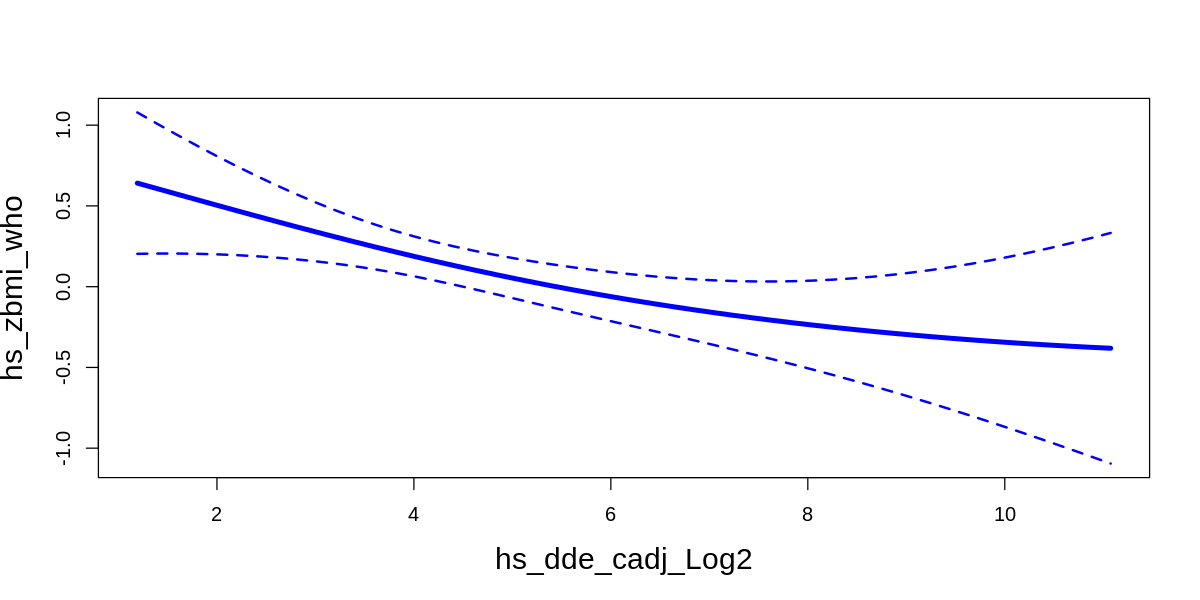

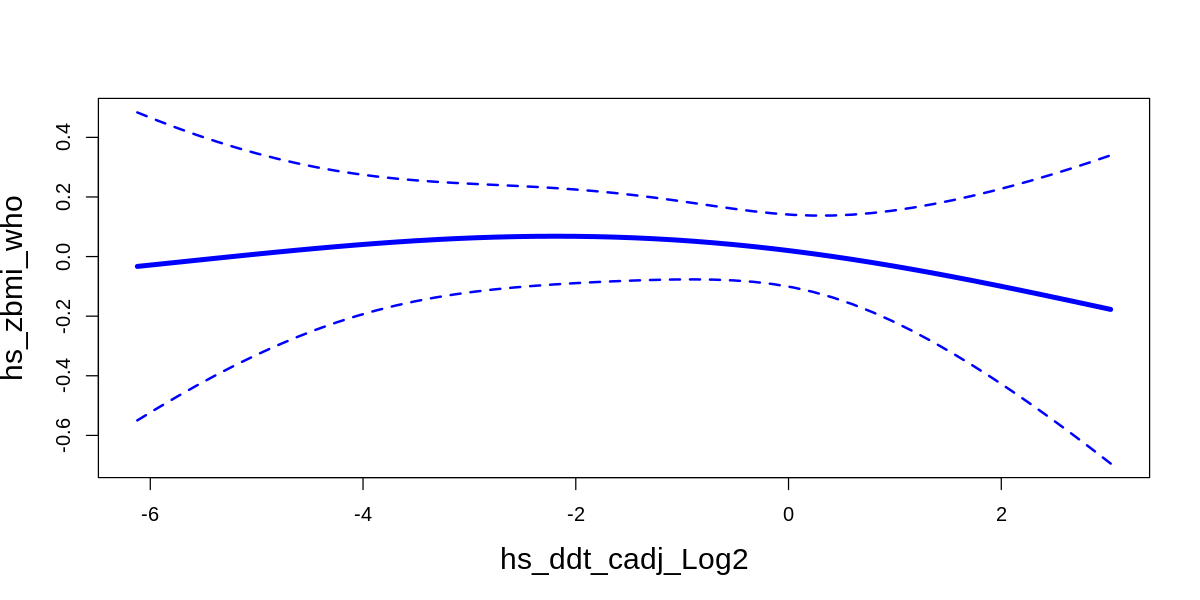

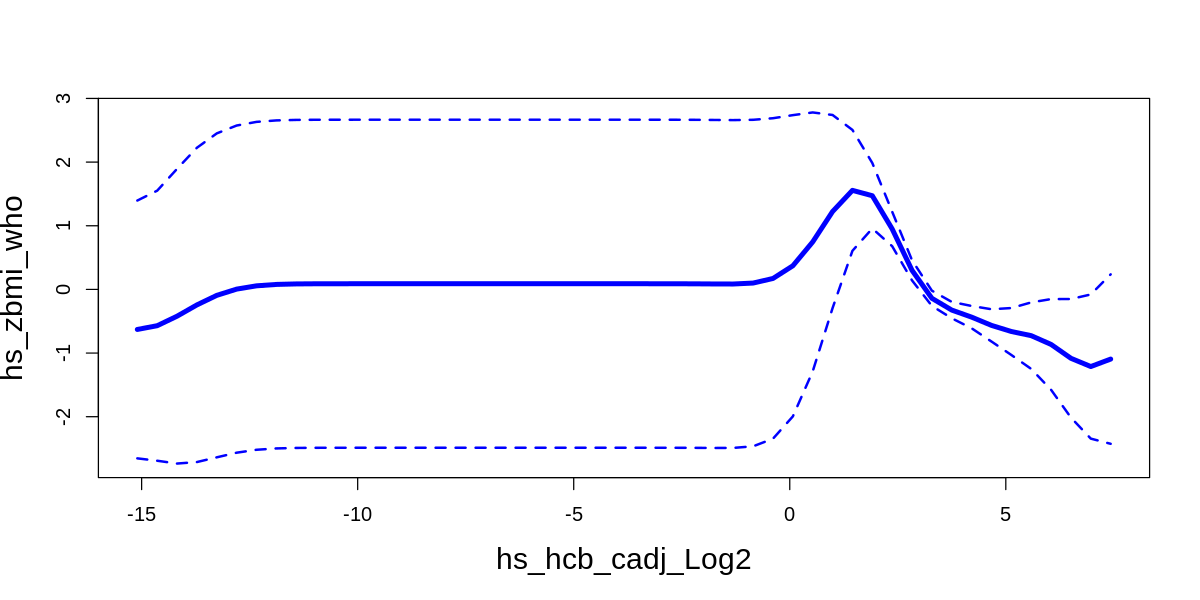

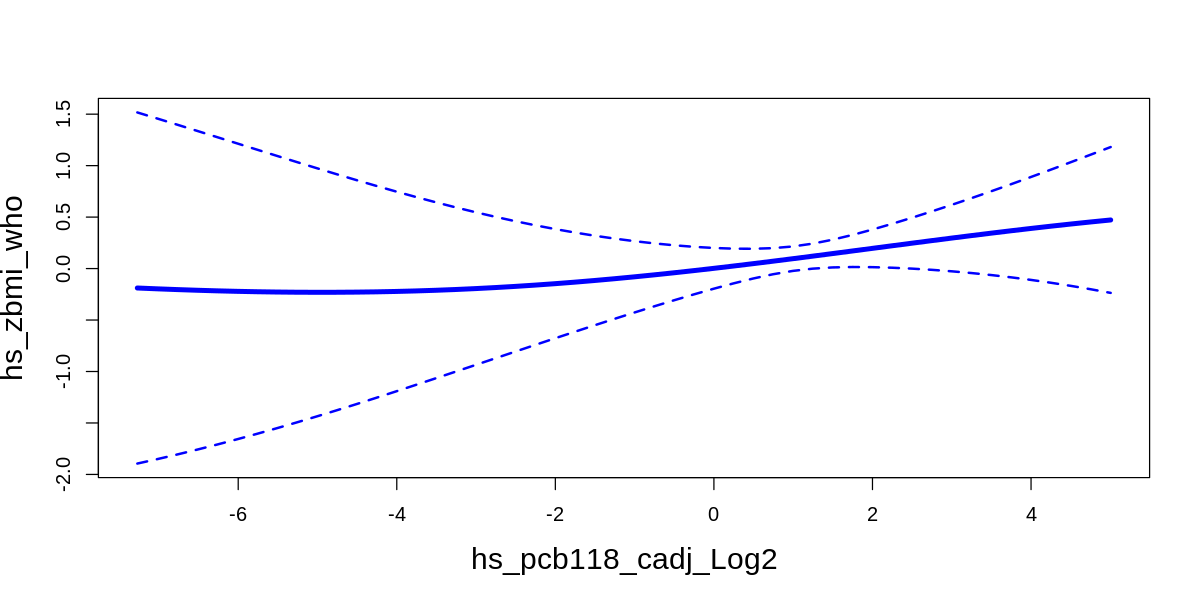

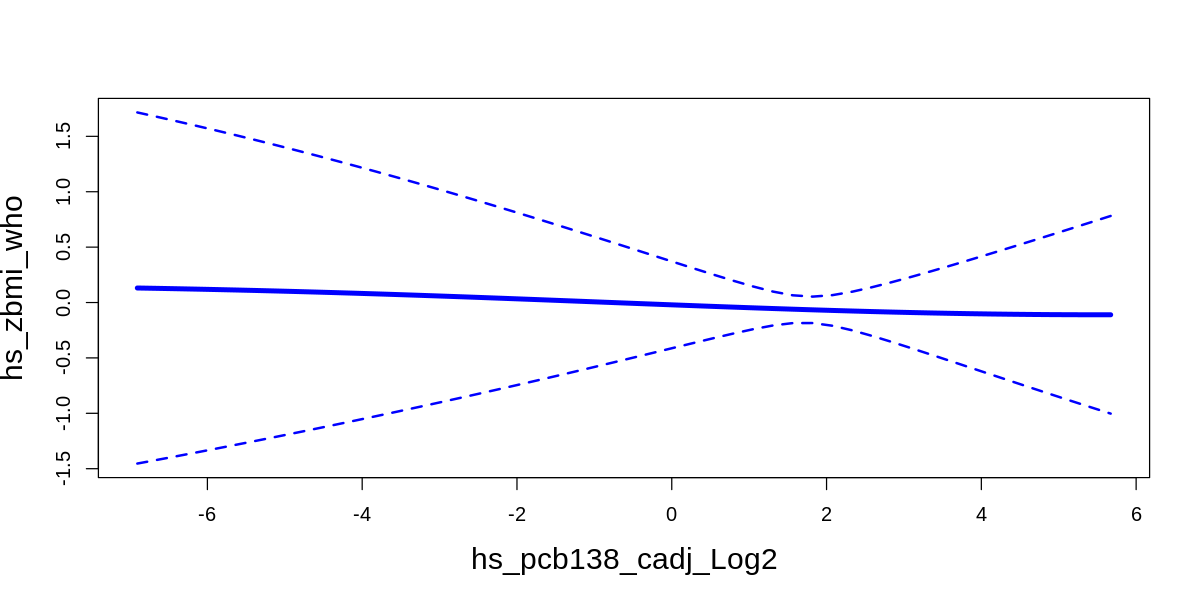

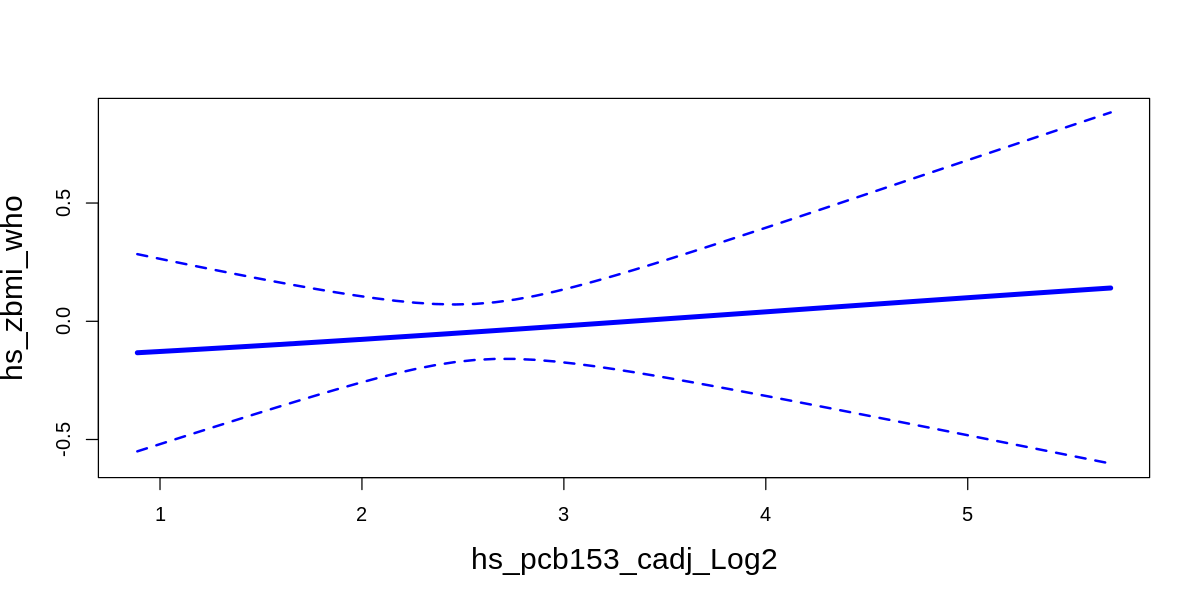

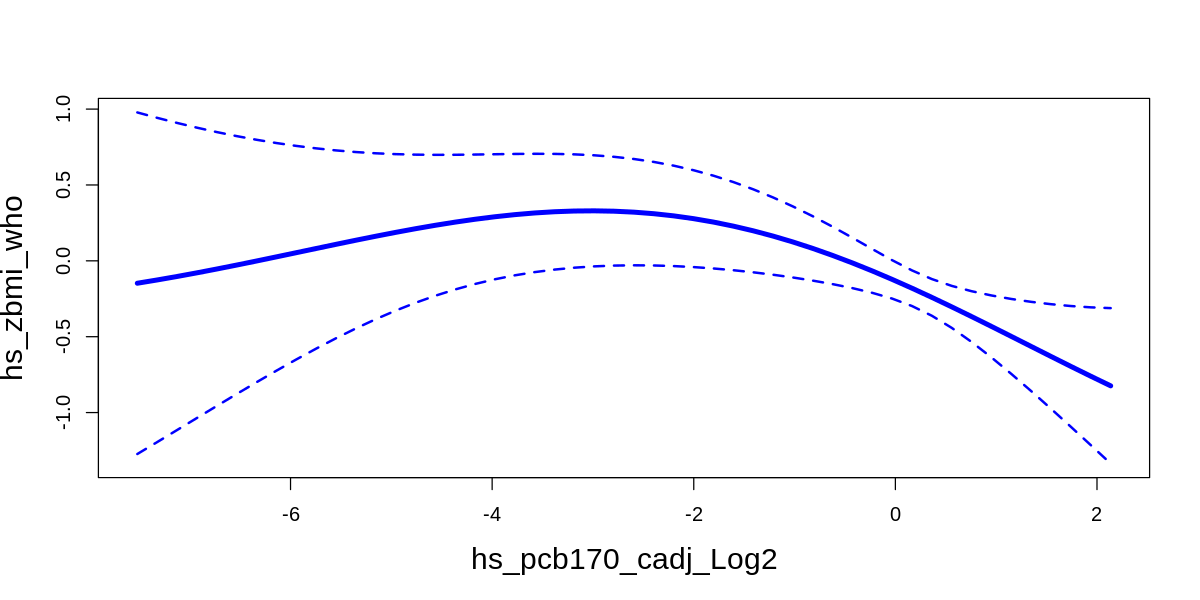

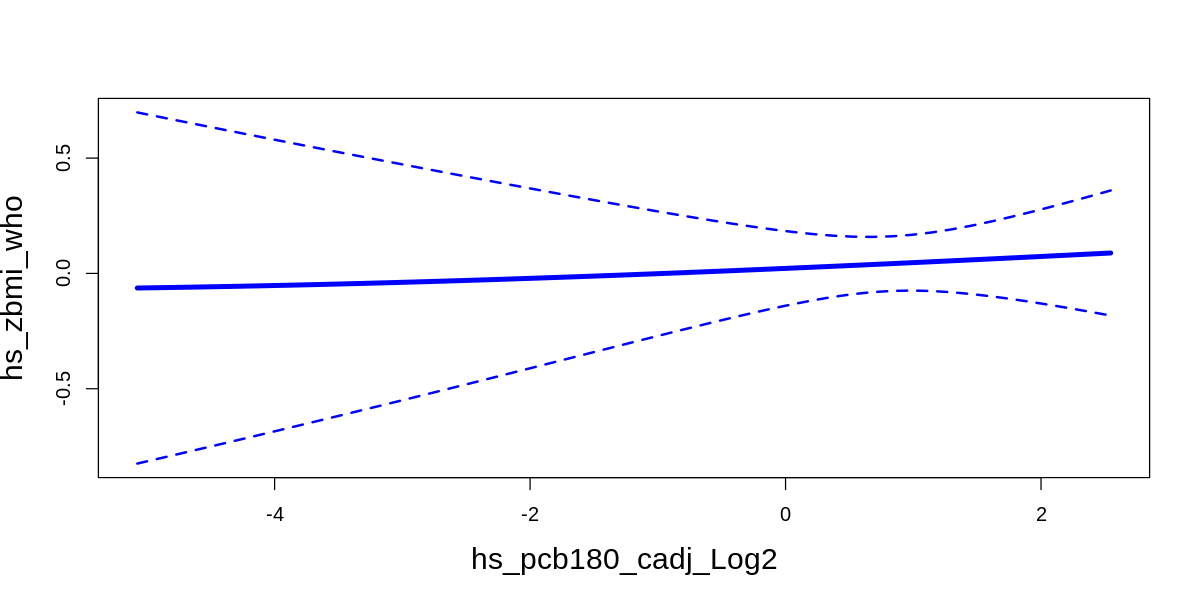

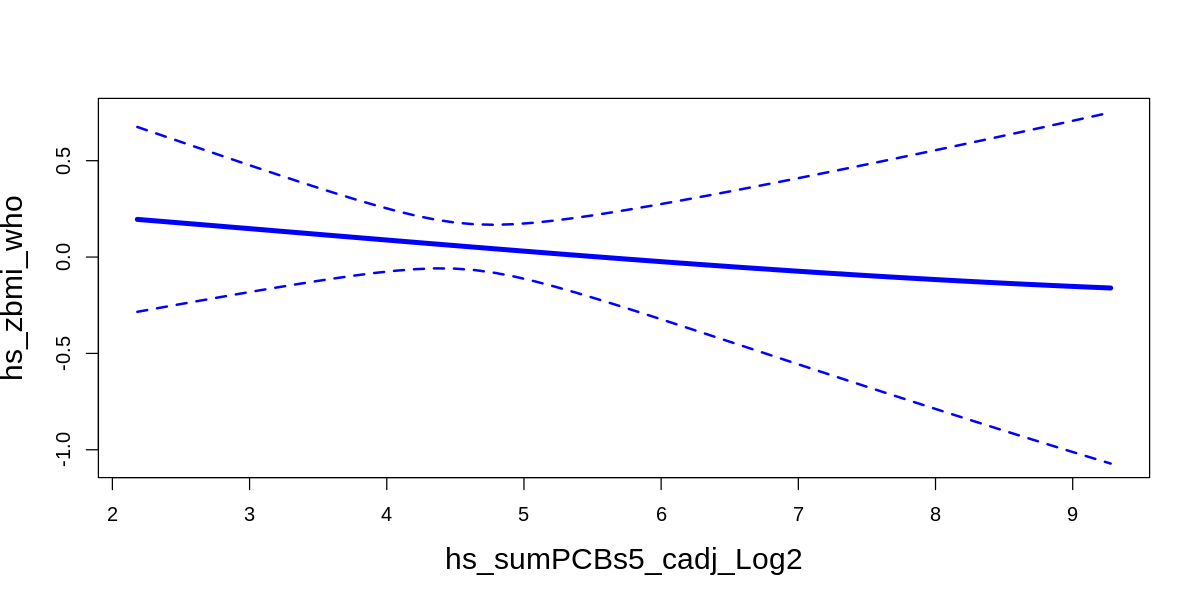

In [ ]:
for (i in 1:length(expo.list)) {
  z <- pred.resp.univar$z[pred.resp.univar$variable==expo.list[i]]
  est <- pred.resp.univar$est[pred.resp.univar$variable==expo.list[i]]
  lower <- pred.resp.univar$est[pred.resp.univar$variable==expo.list[i]]-1.96*pred.resp.univar$se[pred.resp.univar$variable==expo.list[i]]
  upper <- pred.resp.univar$est[pred.resp.univar$variable==expo.list[i]]+1.96*pred.resp.univar$se[pred.resp.univar$variable==expo.list[i]]
  plot(z,est,type="l", col="blue",lwd=4,
     xlab=expo.list[i],ylab="hs_zbmi_who", ylim=c(min(lower),max(upper)),cex.lab=1.5)
  lines(z,lower,lty=2, col="blue",lwd=2)
  lines(z,upper,lty=2, col="blue",lwd=2)
}

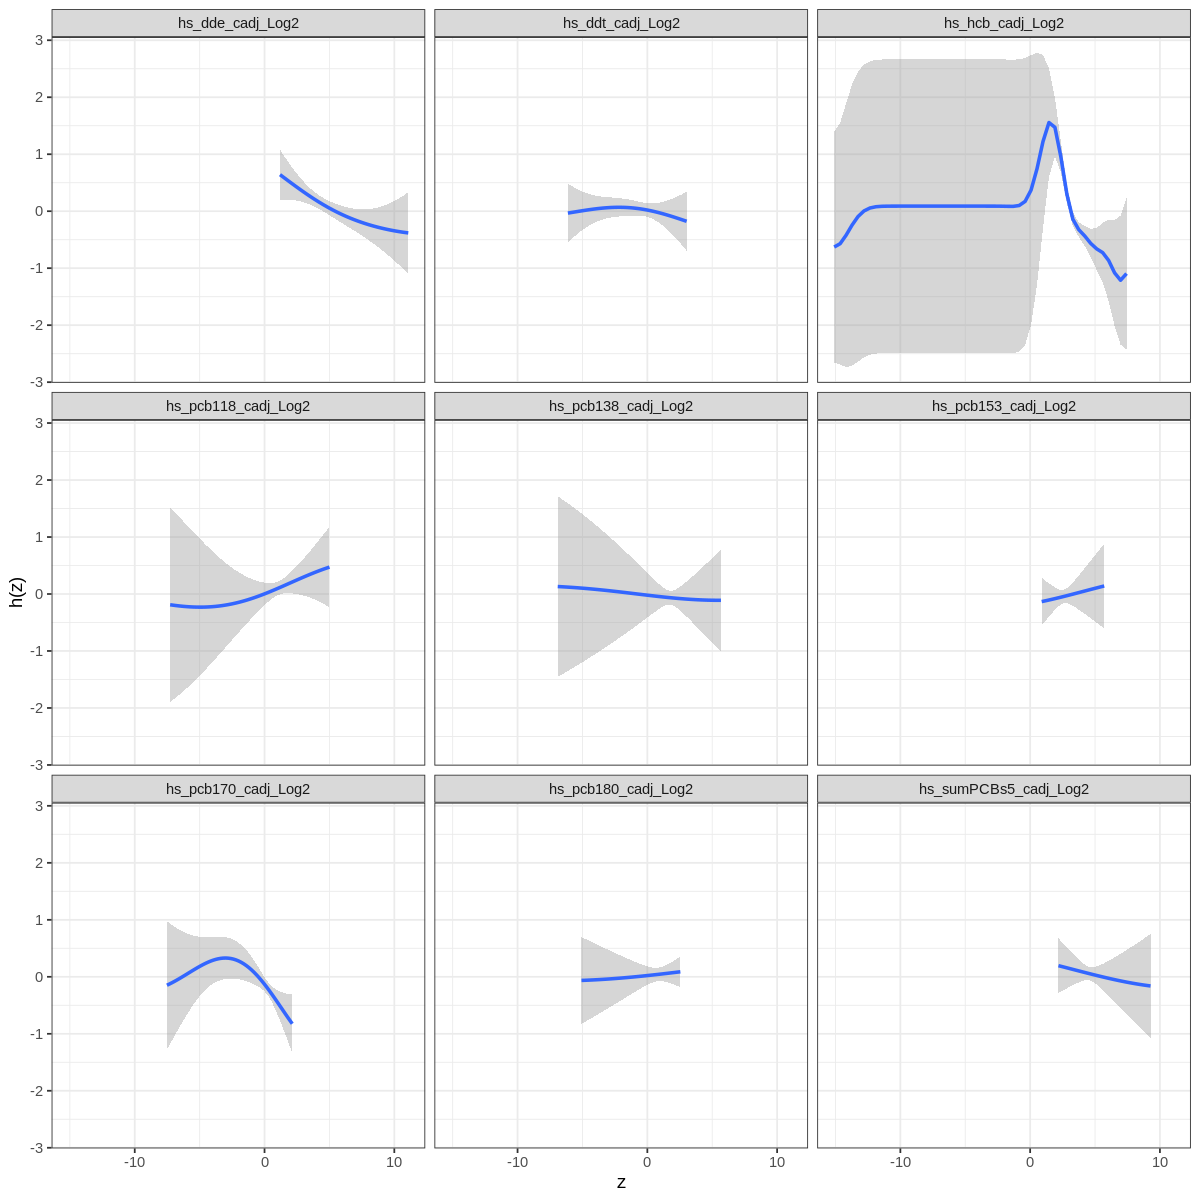

In [ ]:
# We can also use ggplot to look at the graphs
options(repr.plot.width = 10, repr.plot.height = 10) # set graph dimensions
ggplot(pred.resp.univar, aes(z, est, ymin = est - 1.96*se,
                             ymax = est + 1.96*se)) +
  geom_smooth(stat = "identity") + ylab("h(z)") +
  facet_wrap(~ variable) +
  theme_bw()

Additionally we can obtain the overall effect of the mix using the `bkmr::OverallRiskSummaries` function.

In [ ]:
risks.overall <- bkmr::OverallRiskSummaries(fit=fitkm, qs=seq(0.25, 0.75, by=0.05),
                                      q.fixed = 0.5, method = "approx")

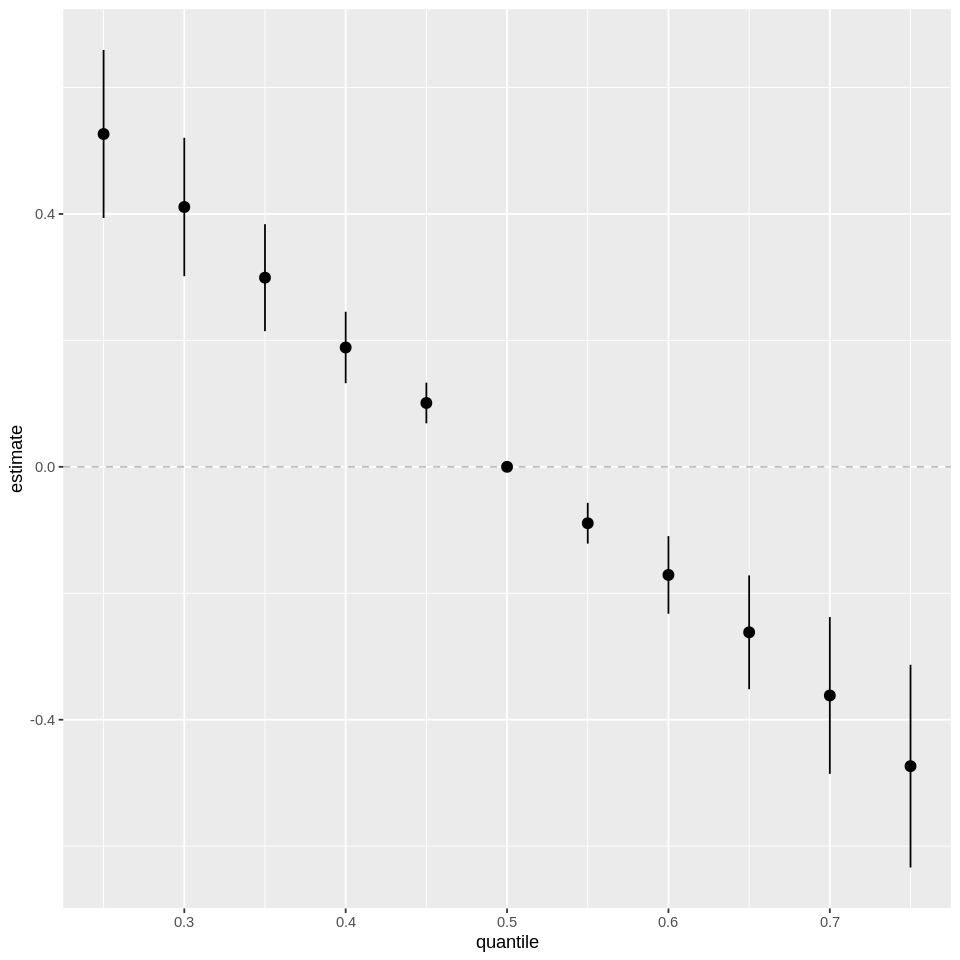

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8) # set graph dimensions
ggplot(risks.overall, aes(quantile, est, ymin = est - 1.96*sd,
                          ymax = est + 1.96*sd)) +
  geom_hline(yintercept=00, linetype="dashed", color="gray") +
  geom_pointrange() + scale_y_continuous(name="estimate")

If we want to know the contribution of an individual predictor to the health outcome under analysis, we use the function `bkmr::SingVarRiskSummaries`.

In [ ]:
risks.singvar <- SingVarRiskSummaries(fit= fitkm, qs.diff = c(0.25, 0.75),
                                      q.fixed = c(0.25, 0.50, 0.75),
                                      method = "approx")

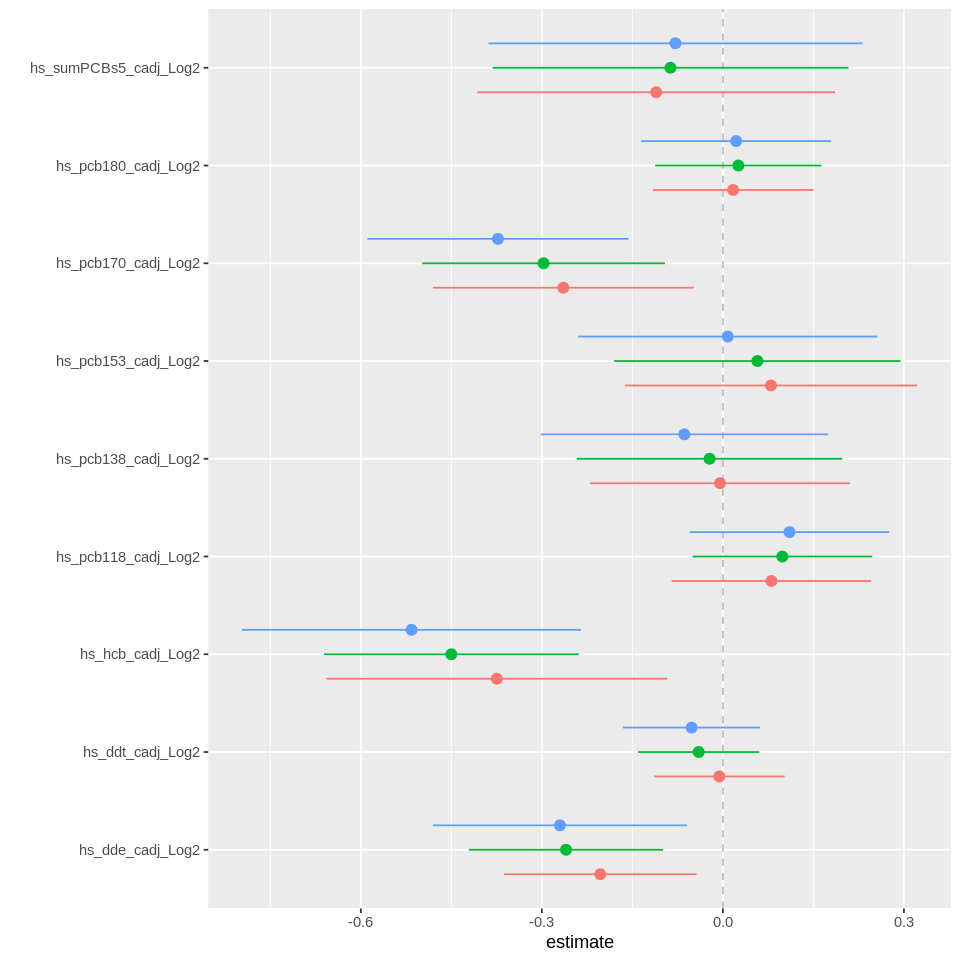

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8) # set graph dimensions
ggplot(risks.singvar, aes(variable, est, ymin = est - 1.96*sd,
                          ymax = est + 1.96*sd, col = q.fixed)) +
       geom_hline(aes(yintercept=0), linetype="dashed", color="gray") +
       geom_pointrange(position = position_dodge(width = 0.75)) +
       coord_flip() + theme(legend.position="none")+scale_x_discrete(name="") +
       scale_y_continuous(name="estimate")

## **5.- Other tutorials for exposome research** <a name=‘tutorials’></a> <a name=‘tutorials’></a>

Appart from this advanced tutorial, additional e-learning materials, code samples and online books have been generated by ATHLETE project explaining how to implement our developments. Each resource includes clear installation instructions, usage recommendations and real-data showcases illustrating real-world applications. Below we enumerate all of them:

- **Tutorial on ExposomeShiny app** ([link](https://isglobal-brge.github.io/exposome_bookdown/))  
  ExposomeShiny is a data-analysis toolbox implementing the full exposome pipeline: data handling (imputation, LOD, transformation, …), exposome characterization, exposome-wide association analysis, multivariate association, omic-data integration and post-omic analyses (CTD database or enrichment). It wraps Bioconductor packages (rexposome, omicRexposome, CTDquerier, etc.) so you can run them without writing any R code. This tutorial explains how to install and use the ExposomeShiny app.

- **Tutorial on Exposome data analysis with Bioconductor** ([link](https://rpubs.com/jrgonzalezISGlobal/rexposome))  
  Learn the full exposome pipeline in R: data handling (imputation, LOD, transformation, …), exposome characterization (dimensionality reduction, clustering), exposome-wide association, multivariate methods, etc. This tutorial introduces the `rexposome` package and provides reproducible code examples.

- **Tutorial on Repeated Exposome data analysis** ([link](https://github.com/AugustoAnguita/simulation_repeated_exposures))  
  A GitHub repo with R code and simulated data to compare statistical approaches for detecting exposome–health associations in longitudinal settings. Covers a variety of causal scenarios and regression-based methods, plus an application to the INMA mother-child cohort (Spain).

- **Tutorial on outcome-wide analysis methods** ([link](https://rpubs.com/aanguita/outcome_wide_analysis))  
  GitHub + Rpubs tutorial with scripts and a simulated multivariate dataset for outcome-wide methods in exposome research. Includes data standardization, model calibration, output curation and visualization.

- **Tutorial on resources and their use in DataSHIELD** ([link](https://isglobal-brge.github.io/exposome_bookdown/))  
  Online book and video tutorials teaching non-disclosive analysis of biomedical data with R and DataSHIELD. Shows how to use the `resourcer` package to analyze data in different formats (CSV, SPSS, R, …) and handle big-data settings (omics, geospatial).

- **Tutorial on using resources in Opal and DataSHIELD** ([link](https://rpubs.com/jrgonzalezISGlobal/tutorial_resources))  
  Step-by-step guide to set up Opal, upload resources and work with Opal servers in the DataSHIELD environment.

- **Tutorial on Exposome data analysis with DataSHIELD** ([link](https://rpubs.com/jrgonzalezISGlobal/exposomeDataSHIELD))  
  Extends the exposome R tutorials to a federated DataSHIELD setup.

- **Tutorial on omics data analysis with DataSHIELD** ([link](https://rpubs.com/jrgonzalezISGlobal/tutorial_DSomics))  
  Federated omics workflows in DataSHIELD: GWAS for SNP data, polygenic risk scores, genome-wide gene expression and DNA methylation analyses.

- **Tutorial on the use of dsLassoCov in DataSHIELD** ([link](https://rpubs.com/aanguita/986397))  
  Online companion demonstrating feature selection with LASSO and ElasticNet in DataSHIELD, using HELIX cohort data. Introduces the `dsLassoCov` functions for confounder control in penalized regression.


## **6.- Acknowledgment:** <a name=‘acknowledgement’></a> <a name=‘acknowledgement’></a>

ATHLETE project has received funding from the **European Union’s Horizon 2020** research and innovation programme under grant agreement **No 874583**. This publication reflects only the authors’ view and the European Commission is not responsible for any use that may be made of the information it contains.


<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/exposoma.png?raw=1" alt="ISGlobal logo" width="500"/>